##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq, StaticArrays, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k = 0.0;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [33]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [35]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 50000)
i = 1
plane = (2, 0.0)
tf = 5000.0
tr = 10000.0
p_index = 10

10

In [36]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000012000240005
parameter = 0.0500002400048001
parameter = 0.050000360007200144
parameter = 0.05000048000960019
parameter = 0.05000060001200024
parameter = 0.050000720014400285
parameter = 0.05000084001680034
parameter = 0.05000096001920038
parameter = 0.05000108002160043
parameter = 0.05000120002400048
parameter = 0.05000132002640053
parameter = 0.050001440028800574
parameter = 0.050001560031200626
parameter = 0.05000168003360067
parameter = 0.05000180003600072
parameter = 0.05000192003840077
parameter = 0.05000204004080082
parameter = 0.05000216004320086
parameter = 0.050002280045600915
parameter = 0.05000240004800096
parameter = 0.05000252005040101
parameter = 0.050002640052801056
parameter = 0.0500027600552011
parameter = 0.05000288005760115
parameter = 0.0500030000600012
parameter = 0.05000312006240125
parameter = 0.050003240064801294
parameter = 0.050003360067201345
parameter = 0.05000348006960139
parameter = 0.05000360007200144
parameter = 0.0500

parameter = 0.05003048060961219
parameter = 0.05003060061201224
parameter = 0.050030720614412286
parameter = 0.05003084061681234
parameter = 0.05003096061921238
parameter = 0.050031080621612434
parameter = 0.05003120062401248
parameter = 0.05003132062641253
parameter = 0.050031440628812575
parameter = 0.05003156063121263
parameter = 0.05003168063361267
parameter = 0.05003180063601272
parameter = 0.05003192063841277
parameter = 0.05003204064081282
parameter = 0.050032160643212864
parameter = 0.050032280645612916
parameter = 0.05003240064801296
parameter = 0.050032520650413005
parameter = 0.05003264065281306
parameter = 0.0500327606552131
parameter = 0.05003288065761315
parameter = 0.0500330006600132
parameter = 0.05003312066241325
parameter = 0.050033240664813294
parameter = 0.050033360667213346
parameter = 0.05003348066961339
parameter = 0.05003360067201344
parameter = 0.05003372067441349
parameter = 0.05003384067681354
parameter = 0.050033960679213584
parameter = 0.050034080681613635


parameter = 0.05006096121922438
parameter = 0.050061081221624434
parameter = 0.05006120122402448
parameter = 0.05006132122642453
parameter = 0.050061441228824576
parameter = 0.05006156123122463
parameter = 0.05006168123362467
parameter = 0.050061801236024724
parameter = 0.05006192123842477
parameter = 0.05006204124082481
parameter = 0.050062161243224865
parameter = 0.05006228124562491
parameter = 0.05006240124802496
parameter = 0.050062521250425006
parameter = 0.05006264125282506
parameter = 0.0500627612552251
parameter = 0.050062881257625154
parameter = 0.0500630012600252
parameter = 0.05006312126242525
parameter = 0.050063241264825295
parameter = 0.05006336126722535
parameter = 0.05006348126962539
parameter = 0.05006360127202544
parameter = 0.05006372127442549
parameter = 0.05006384127682554
parameter = 0.050063961279225584
parameter = 0.050064081281625636
parameter = 0.05006420128402568
parameter = 0.050064321286425725
parameter = 0.05006444128882578
parameter = 0.05006456129122582


parameter = 0.050091441828836576
parameter = 0.05009156183123663
parameter = 0.05009168183363667
parameter = 0.05009180183603672
parameter = 0.05009192183843677
parameter = 0.050092041840836814
parameter = 0.050092161843236865
parameter = 0.05009228184563691
parameter = 0.05009240184803696
parameter = 0.050092521850437007
parameter = 0.05009264185283706
parameter = 0.0500927618552371
parameter = 0.050092881857637155
parameter = 0.0500930018600372
parameter = 0.05009312186243725
parameter = 0.050093241864837296
parameter = 0.05009336186723735
parameter = 0.05009348186963739
parameter = 0.050093601872037444
parameter = 0.05009372187443749
parameter = 0.05009384187683754
parameter = 0.050093961879237585
parameter = 0.05009408188163763
parameter = 0.05009420188403768
parameter = 0.050094321886437726
parameter = 0.05009444188883778
parameter = 0.05009456189123782
parameter = 0.050094681893637874
parameter = 0.05009480189603792
parameter = 0.05009492189843797
parameter = 0.050095041900838015

parameter = 0.05012192243844877
parameter = 0.050122042440848814
parameter = 0.050122162443248866
parameter = 0.05012228244564891
parameter = 0.05012240244804896
parameter = 0.05012252245044901
parameter = 0.05012264245284906
parameter = 0.050122762455249104
parameter = 0.050122882457649155
parameter = 0.0501230024600492
parameter = 0.05012312246244925
parameter = 0.050123242464849296
parameter = 0.05012336246724935
parameter = 0.05012348246964939
parameter = 0.050123602472049444
parameter = 0.05012372247444949
parameter = 0.050123842476849534
parameter = 0.050123962479249586
parameter = 0.05012408248164963
parameter = 0.05012420248404968
parameter = 0.05012432248644973
parameter = 0.05012444248884978
parameter = 0.05012456249124982
parameter = 0.050124682493649875
parameter = 0.05012480249604992
parameter = 0.05012492249844997
parameter = 0.050125042500850016
parameter = 0.05012516250325007
parameter = 0.05012528250565011
parameter = 0.050125402508050164
parameter = 0.0501255225104502

parameter = 0.05015252305046101
parameter = 0.05015264305286106
parameter = 0.050152763055261104
parameter = 0.050152883057661156
parameter = 0.0501530030600612
parameter = 0.05015312306246125
parameter = 0.0501532430648613
parameter = 0.05015336306726135
parameter = 0.05015348306966139
parameter = 0.05015360307206144
parameter = 0.05015372307446149
parameter = 0.050153843076861535
parameter = 0.050153963079261586
parameter = 0.05015408308166163
parameter = 0.05015420308406168
parameter = 0.05015432308646173
parameter = 0.05015444308886178
parameter = 0.050154563091261824
parameter = 0.050154683093661875
parameter = 0.05015480309606192
parameter = 0.05015492309846197
parameter = 0.050155043100862017
parameter = 0.05015516310326207
parameter = 0.05015528310566211
parameter = 0.050155403108062165
parameter = 0.05015552311046221
parameter = 0.050155643112862254
parameter = 0.050155763115262306
parameter = 0.05015588311766235
parameter = 0.0501560031200624
parameter = 0.05015612312246245
p

parameter = 0.0501830036600732
parameter = 0.050183123662473246
parameter = 0.0501832436648733
parameter = 0.05018336366727334
parameter = 0.050183483669673394
parameter = 0.05018360367207344
parameter = 0.05018372367447349
parameter = 0.050183843676873535
parameter = 0.05018396367927359
parameter = 0.05018408368167363
parameter = 0.05018420368407368
parameter = 0.05018432368647373
parameter = 0.05018444368887378
parameter = 0.050184563691273824
parameter = 0.050184683693673876
parameter = 0.05018480369607392
parameter = 0.05018492369847397
parameter = 0.05018504370087402
parameter = 0.05018516370327407
parameter = 0.050185283705674114
parameter = 0.05018540370807416
parameter = 0.05018552371047421
parameter = 0.050185643712874255
parameter = 0.050185763715274306
parameter = 0.05018588371767435
parameter = 0.0501860037200744
parameter = 0.05018612372247445
parameter = 0.0501862437248745
parameter = 0.050186363727274544
parameter = 0.050186483729674596
parameter = 0.05018660373207464
pa

parameter = 0.050213484269685395
parameter = 0.05021360427208544
parameter = 0.05021372427448549
parameter = 0.050213844276885536
parameter = 0.05021396427928559
parameter = 0.05021408428168563
parameter = 0.050214204284085684
parameter = 0.05021432428648573
parameter = 0.05021444428888578
parameter = 0.050214564291285825
parameter = 0.05021468429368588
parameter = 0.05021480429608592
parameter = 0.05021492429848597
parameter = 0.05021504430088602
parameter = 0.05021516430328606
parameter = 0.050215284305686114
parameter = 0.05021540430808616
parameter = 0.05021552431048621
parameter = 0.050215644312886255
parameter = 0.05021576431528631
parameter = 0.05021588431768635
parameter = 0.0502160043200864
parameter = 0.05021612432248645
parameter = 0.0502162443248865
parameter = 0.050216364327286545
parameter = 0.050216484329686596
parameter = 0.05021660433208664
parameter = 0.05021672433448669
parameter = 0.05021684433688674
parameter = 0.05021696433928679
parameter = 0.050217084341686834
p

parameter = 0.05024396487929759
parameter = 0.05024408488169763
parameter = 0.050244204884097685
parameter = 0.05024432488649773
parameter = 0.05024444488889778
parameter = 0.050244564891297826
parameter = 0.05024468489369788
parameter = 0.05024480489609792
parameter = 0.05024492489849797
parameter = 0.05024504490089802
parameter = 0.05024516490329806
parameter = 0.050245284905698115
parameter = 0.05024540490809816
parameter = 0.05024552491049821
parameter = 0.050245644912898256
parameter = 0.05024576491529831
parameter = 0.05024588491769835
parameter = 0.050246004920098404
parameter = 0.05024612492249845
parameter = 0.0502462449248985
parameter = 0.050246364927298545
parameter = 0.0502464849296986
parameter = 0.05024660493209864
parameter = 0.05024672493449869
parameter = 0.05024684493689874
parameter = 0.05024696493929878
parameter = 0.050247084941698834
parameter = 0.05024720494409888
parameter = 0.05024732494649893
parameter = 0.050247444948898976
parameter = 0.05024756495129903
pa

parameter = 0.05027444548890978
parameter = 0.050274565491309826
parameter = 0.05027468549370987
parameter = 0.05027480549610992
parameter = 0.05027492549850997
parameter = 0.05027504550091002
parameter = 0.050275165503310064
parameter = 0.050275285505710116
parameter = 0.05027540550811016
parameter = 0.05027552551051021
parameter = 0.05027564551291026
parameter = 0.05027576551531031
parameter = 0.05027588551771035
parameter = 0.050276005520110405
parameter = 0.05027612552251045
parameter = 0.0502762455249105
parameter = 0.050276365527310546
parameter = 0.0502764855297106
parameter = 0.05027660553211064
parameter = 0.05027672553451069
parameter = 0.05027684553691074
parameter = 0.05027696553931078
parameter = 0.050277085541710835
parameter = 0.05027720554411088
parameter = 0.05027732554651093
parameter = 0.050277445548910976
parameter = 0.05027756555131103
parameter = 0.05027768555371107
parameter = 0.050277805556111124
parameter = 0.05027792555851117
parameter = 0.05027804556091122
pa

parameter = 0.05030492609852197
parameter = 0.05030504610092202
parameter = 0.050305166103322065
parameter = 0.050305286105722116
parameter = 0.05030540610812216
parameter = 0.05030552611052221
parameter = 0.05030564611292226
parameter = 0.05030576611532231
parameter = 0.050305886117722354
parameter = 0.050306006120122405
parameter = 0.05030612612252245
parameter = 0.0503062461249225
parameter = 0.05030636612732255
parameter = 0.05030648612972259
parameter = 0.05030660613212264
parameter = 0.05030672613452269
parameter = 0.05030684613692274
parameter = 0.050306966139322784
parameter = 0.050307086141722836
parameter = 0.05030720614412288
parameter = 0.05030732614652293
parameter = 0.05030744614892298
parameter = 0.05030756615132303
parameter = 0.05030768615372307
parameter = 0.050307806156123125
parameter = 0.05030792615852317
parameter = 0.05030804616092322
parameter = 0.050308166163323266
parameter = 0.05030828616572332
parameter = 0.05030840616812336
parameter = 0.05030852617052341
p

parameter = 0.05033540670813416
parameter = 0.05033552671053421
parameter = 0.05033564671293426
parameter = 0.05033576671533431
parameter = 0.050335886717734354
parameter = 0.050336006720134406
parameter = 0.05033612672253445
parameter = 0.050336246724934496
parameter = 0.05033636672733455
parameter = 0.05033648672973459
parameter = 0.050336606732134644
parameter = 0.05033672673453469
parameter = 0.05033684673693474
parameter = 0.050336966739334785
parameter = 0.050337086741734836
parameter = 0.05033720674413488
parameter = 0.05033732674653493
parameter = 0.05033744674893498
parameter = 0.05033756675133503
parameter = 0.050337686753735074
parameter = 0.050337806756135126
parameter = 0.05033792675853517
parameter = 0.05033804676093522
parameter = 0.05033816676333527
parameter = 0.05033828676573531
parameter = 0.05033840676813536
parameter = 0.05033852677053541
parameter = 0.05033864677293546
parameter = 0.050338766775335504
parameter = 0.050338886777735556
parameter = 0.0503390067801356

parameter = 0.050365887317746355
parameter = 0.0503660073201464
parameter = 0.05036612732254645
parameter = 0.050366247324946496
parameter = 0.05036636732734655
parameter = 0.05036648732974659
parameter = 0.050366607332146644
parameter = 0.05036672733454669
parameter = 0.05036684733694674
parameter = 0.050366967339346785
parameter = 0.05036708734174684
parameter = 0.05036720734414688
parameter = 0.05036732734654693
parameter = 0.05036744734894698
parameter = 0.05036756735134703
parameter = 0.050367687353747075
parameter = 0.050367807356147126
parameter = 0.05036792735854717
parameter = 0.050368047360947216
parameter = 0.05036816736334727
parameter = 0.05036828736574731
parameter = 0.050368407368147364
parameter = 0.05036852737054741
parameter = 0.05036864737294746
parameter = 0.050368767375347505
parameter = 0.05036888737774756
parameter = 0.0503690073801476
parameter = 0.05036912738254765
parameter = 0.0503692473849477
parameter = 0.05036936738734775
parameter = 0.050369487389747794
p

parameter = 0.05039648792975859
parameter = 0.050396607932158645
parameter = 0.05039672793455869
parameter = 0.05039684793695874
parameter = 0.050396967939358786
parameter = 0.05039708794175884
parameter = 0.05039720794415888
parameter = 0.050397327946558934
parameter = 0.05039744794895898
parameter = 0.05039756795135903
parameter = 0.050397687953759075
parameter = 0.05039780795615912
parameter = 0.05039792795855917
parameter = 0.050398047960959216
parameter = 0.05039816796335927
parameter = 0.05039828796575931
parameter = 0.050398407968159364
parameter = 0.05039852797055941
parameter = 0.05039864797295946
parameter = 0.050398767975359506
parameter = 0.05039888797775956
parameter = 0.0503990079801596
parameter = 0.050399127982559654
parameter = 0.0503992479849597
parameter = 0.05039936798735975
parameter = 0.050399487989759795
parameter = 0.050399607992159846
parameter = 0.05039972799455989
parameter = 0.050399847996959936
parameter = 0.05039996799935999
parameter = 0.05040008800176003

parameter = 0.05042696853937079
parameter = 0.05042708854177084
parameter = 0.05042720854417088
parameter = 0.050427328546570935
parameter = 0.05042744854897098
parameter = 0.050427568551371024
parameter = 0.050427688553771076
parameter = 0.05042780855617112
parameter = 0.05042792855857117
parameter = 0.05042804856097122
parameter = 0.05042816856337127
parameter = 0.05042828856577131
parameter = 0.050428408568171365
parameter = 0.05042852857057141
parameter = 0.05042864857297146
parameter = 0.050428768575371506
parameter = 0.05042888857777156
parameter = 0.0504290085801716
parameter = 0.050429128582571654
parameter = 0.0504292485849717
parameter = 0.05042936858737175
parameter = 0.050429488589771795
parameter = 0.05042960859217184
parameter = 0.05042972859457189
parameter = 0.050429848596971937
parameter = 0.05042996859937199
parameter = 0.05043008860177203
parameter = 0.050430208604172085
parameter = 0.05043032860657213
parameter = 0.05043044860897218
parameter = 0.050430568611372226


parameter = 0.05045744914898298
parameter = 0.050457569151383025
parameter = 0.05045768915378308
parameter = 0.05045780915618312
parameter = 0.05045792915858317
parameter = 0.05045804916098322
parameter = 0.05045816916338327
parameter = 0.050458289165783314
parameter = 0.050458409168183366
parameter = 0.05045852917058341
parameter = 0.05045864917298346
parameter = 0.05045876917538351
parameter = 0.05045888917778356
parameter = 0.0504590091801836
parameter = 0.050459129182583655
parameter = 0.0504592491849837
parameter = 0.050459369187383744
parameter = 0.050459489189783796
parameter = 0.05045960919218384
parameter = 0.05045972919458389
parameter = 0.05045984919698394
parameter = 0.05045996919938399
parameter = 0.050460089201784034
parameter = 0.050460209204184085
parameter = 0.05046032920658413
parameter = 0.05046044920898418
parameter = 0.050460569211384226
parameter = 0.05046068921378428
parameter = 0.05046080921618432
parameter = 0.050460929218584374
parameter = 0.05046104922098442


parameter = 0.050487929758595174
parameter = 0.05048804976099522
parameter = 0.05048816976339527
parameter = 0.050488289765795315
parameter = 0.050488409768195366
parameter = 0.05048852977059541
parameter = 0.05048864977299546
parameter = 0.05048876977539551
parameter = 0.05048888977779556
parameter = 0.050489009780195604
parameter = 0.05048912978259565
parameter = 0.0504892497849957
parameter = 0.050489369787395745
parameter = 0.0504894897897958
parameter = 0.05048960979219584
parameter = 0.05048972979459589
parameter = 0.05048984979699594
parameter = 0.05048996979939599
parameter = 0.050490089801796034
parameter = 0.050490209804196086
parameter = 0.05049032980659613
parameter = 0.05049044980899618
parameter = 0.05049056981139623
parameter = 0.05049068981379628
parameter = 0.05049080981619632
parameter = 0.050490929818596375
parameter = 0.05049104982099642
parameter = 0.050491169823396465
parameter = 0.050491289825796516
parameter = 0.05049140982819656
parameter = 0.05049152983059661


parameter = 0.05051841036820737
parameter = 0.05051853037060741
parameter = 0.050518650373007463
parameter = 0.05051877037540751
parameter = 0.05051889037780755
parameter = 0.050519010380207605
parameter = 0.05051913038260765
parameter = 0.0505192503850077
parameter = 0.050519370387407746
parameter = 0.0505194903898078
parameter = 0.05051961039220784
parameter = 0.050519730394607894
parameter = 0.05051985039700794
parameter = 0.05051997039940799
parameter = 0.050520090401808035
parameter = 0.05052021040420809
parameter = 0.05052033040660813
parameter = 0.05052045040900818
parameter = 0.05052057041140823
parameter = 0.05052069041380828
parameter = 0.050520810416208324
parameter = 0.05052093041860837
parameter = 0.05052105042100842
parameter = 0.050521170423408465
parameter = 0.05052129042580852
parameter = 0.05052141042820856
parameter = 0.05052153043060861
parameter = 0.05052165043300866
parameter = 0.05052177043540871
parameter = 0.050521890437808754
parameter = 0.050522010440208806
p

parameter = 0.050549010980219605
parameter = 0.05054913098261965
parameter = 0.0505492509850197
parameter = 0.050549370987419746
parameter = 0.0505494909898198
parameter = 0.05054961099221984
parameter = 0.050549730994619894
parameter = 0.05054985099701994
parameter = 0.05054997099941999
parameter = 0.050550091001820036
parameter = 0.05055021100422009
parameter = 0.05055033100662013
parameter = 0.050550451009020184
parameter = 0.05055057101142023
parameter = 0.05055069101382027
parameter = 0.050550811016220325
parameter = 0.05055093101862037
parameter = 0.05055105102102042
parameter = 0.050551171023420466
parameter = 0.05055129102582052
parameter = 0.05055141102822056
parameter = 0.050551531030620614
parameter = 0.05055165103302066
parameter = 0.05055177103542071
parameter = 0.050551891037820755
parameter = 0.05055201104022081
parameter = 0.05055213104262085
parameter = 0.0505522510450209
parameter = 0.05055237104742095
parameter = 0.050552491049821
parameter = 0.050552611052221044
par

parameter = 0.0505794915898318
parameter = 0.05057961159223184
parameter = 0.050579731594631895
parameter = 0.05057985159703194
parameter = 0.05057997159943199
parameter = 0.050580091601832036
parameter = 0.05058021160423209
parameter = 0.05058033160663213
parameter = 0.05058045160903218
parameter = 0.05058057161143223
parameter = 0.050580691613832274
parameter = 0.050580811616232325
parameter = 0.05058093161863237
parameter = 0.05058105162103242
parameter = 0.05058117162343247
parameter = 0.05058129162583252
parameter = 0.05058141162823256
parameter = 0.050581531630632615
parameter = 0.05058165163303266
parameter = 0.05058177163543271
parameter = 0.050581891637832756
parameter = 0.05058201164023281
parameter = 0.05058213164263285
parameter = 0.050582251645032904
parameter = 0.05058237164743295
parameter = 0.05058249164983299
parameter = 0.050582611652233045
parameter = 0.05058273165463309
parameter = 0.05058285165703314
parameter = 0.050582971659433186
parameter = 0.05058309166183324


parameter = 0.05060997219944399
parameter = 0.05061009220184404
parameter = 0.05061021220424408
parameter = 0.05061033220664413
parameter = 0.05061045220904418
parameter = 0.05061057221144423
parameter = 0.050610692213844274
parameter = 0.050610812216244326
parameter = 0.05061093221864437
parameter = 0.05061105222104442
parameter = 0.05061117222344447
parameter = 0.05061129222584452
parameter = 0.050611412228244564
parameter = 0.050611532230644615
parameter = 0.05061165223304466
parameter = 0.05061177223544471
parameter = 0.050611892237844756
parameter = 0.05061201224024481
parameter = 0.05061213224264485
parameter = 0.0506122522450449
parameter = 0.05061237224744495
parameter = 0.050612492249844994
parameter = 0.050612612252245046
parameter = 0.05061273225464509
parameter = 0.05061285225704514
parameter = 0.05061297225944519
parameter = 0.05061309226184524
parameter = 0.05061321226424528
parameter = 0.050613332266645335
parameter = 0.05061345226904538
parameter = 0.05061357227144543
p

parameter = 0.05064045280905618
parameter = 0.05064057281145623
parameter = 0.050640692813856275
parameter = 0.05064081281625633
parameter = 0.05064093281865637
parameter = 0.05064105282105642
parameter = 0.05064117282345647
parameter = 0.05064129282585652
parameter = 0.050641412828256564
parameter = 0.050641532830656616
parameter = 0.05064165283305666
parameter = 0.05064177283545671
parameter = 0.05064189283785676
parameter = 0.0506420128402568
parameter = 0.05064213284265685
parameter = 0.0506422528450569
parameter = 0.05064237284745695
parameter = 0.050642492849856995
parameter = 0.050642612852257046
parameter = 0.05064273285465709
parameter = 0.05064285285705714
parameter = 0.05064297285945719
parameter = 0.05064309286185724
parameter = 0.050643212864257284
parameter = 0.050643332866657335
parameter = 0.05064345286905738
parameter = 0.05064357287145743
parameter = 0.05064369287385748
parameter = 0.05064381287625753
parameter = 0.05064393287865757
parameter = 0.050644052881057625
pa

parameter = 0.05067093341866837
parameter = 0.050671053421068424
parameter = 0.05067117342346847
parameter = 0.05067129342586852
parameter = 0.050671413428268565
parameter = 0.05067153343066862
parameter = 0.05067165343306866
parameter = 0.050671773435468706
parameter = 0.05067189343786876
parameter = 0.0506720134402688
parameter = 0.050672133442668854
parameter = 0.0506722534450689
parameter = 0.05067237344746895
parameter = 0.050672493449868995
parameter = 0.05067261345226905
parameter = 0.05067273345466909
parameter = 0.05067285345706914
parameter = 0.05067297345946919
parameter = 0.05067309346186924
parameter = 0.050673213464269284
parameter = 0.050673333466669336
parameter = 0.05067345346906938
parameter = 0.05067357347146943
parameter = 0.05067369347386948
parameter = 0.05067381347626952
parameter = 0.050673933478669574
parameter = 0.05067405348106962
parameter = 0.05067417348346967
parameter = 0.050674293485869715
parameter = 0.050674413488269766
parameter = 0.05067453349066981


parameter = 0.05070153403068061
parameter = 0.05070165403308066
parameter = 0.05070177403548071
parameter = 0.05070189403788076
parameter = 0.0507020140402808
parameter = 0.050702134042680855
parameter = 0.0507022540450809
parameter = 0.05070237404748095
parameter = 0.050702494049880996
parameter = 0.05070261405228105
parameter = 0.05070273405468109
parameter = 0.050702854057081144
parameter = 0.05070297405948119
parameter = 0.05070309406188124
parameter = 0.050703214064281285
parameter = 0.05070333406668134
parameter = 0.05070345406908138
parameter = 0.050703574071481426
parameter = 0.05070369407388148
parameter = 0.05070381407628152
parameter = 0.050703934078681574
parameter = 0.05070405408108162
parameter = 0.05070417408348167
parameter = 0.050704294085881715
parameter = 0.05070441408828177
parameter = 0.05070453409068181
parameter = 0.05070465409308186
parameter = 0.05070477409548191
parameter = 0.05070489409788196
parameter = 0.050705014100282005
parameter = 0.050705134102682056
p

parameter = 0.050732014640292804
parameter = 0.050732134642692855
parameter = 0.0507322546450929
parameter = 0.05073237464749295
parameter = 0.050732494649893
parameter = 0.05073261465229305
parameter = 0.05073273465469309
parameter = 0.050732854657093145
parameter = 0.05073297465949319
parameter = 0.05073309466189324
parameter = 0.050733214664293286
parameter = 0.05073333466669333
parameter = 0.05073345466909338
parameter = 0.05073357467149343
parameter = 0.05073369467389348
parameter = 0.05073381467629352
parameter = 0.050733934678693575
parameter = 0.05073405468109362
parameter = 0.05073417468349367
parameter = 0.050734294685893716
parameter = 0.05073441468829377
parameter = 0.05073453469069381
parameter = 0.050734654693093864
parameter = 0.05073477469549391
parameter = 0.05073489469789396
parameter = 0.050735014700294005
parameter = 0.05073513470269406
parameter = 0.0507352547050941
parameter = 0.05073537470749415
parameter = 0.0507354947098942
parameter = 0.05073561471229424
param

parameter = 0.050762495249905
parameter = 0.05076261525230505
parameter = 0.050762735254705094
parameter = 0.050762855257105145
parameter = 0.05076297525950519
parameter = 0.050763095261905235
parameter = 0.050763215264305286
parameter = 0.05076333526670533
parameter = 0.05076345526910538
parameter = 0.05076357527150543
parameter = 0.05076369527390548
parameter = 0.050763815276305524
parameter = 0.050763935278705576
parameter = 0.05076405528110562
parameter = 0.05076417528350567
parameter = 0.05076429528590572
parameter = 0.05076441528830577
parameter = 0.05076453529070581
parameter = 0.050764655293105865
parameter = 0.05076477529550591
parameter = 0.05076489529790596
parameter = 0.050765015300306006
parameter = 0.05076513530270606
parameter = 0.0507652553051061
parameter = 0.05076537530750615
parameter = 0.0507654953099062
parameter = 0.05076561531230624
parameter = 0.050765735314706295
parameter = 0.05076585531710634
parameter = 0.05076597531950639
parameter = 0.050766095321906436
pa

parameter = 0.05079297585951719
parameter = 0.050793095861917235
parameter = 0.05079321586431729
parameter = 0.05079333586671733
parameter = 0.050793455869117383
parameter = 0.05079357587151743
parameter = 0.05079369587391748
parameter = 0.050793815876317525
parameter = 0.050793935878717576
parameter = 0.05079405588111762
parameter = 0.05079417588351767
parameter = 0.05079429588591772
parameter = 0.05079441588831777
parameter = 0.050794535890717814
parameter = 0.050794655893117865
parameter = 0.05079477589551791
parameter = 0.050794895897917955
parameter = 0.05079501590031801
parameter = 0.05079513590271805
parameter = 0.0507952559051181
parameter = 0.05079537590751815
parameter = 0.0507954959099182
parameter = 0.050795615912318244
parameter = 0.050795735914718296
parameter = 0.05079585591711834
parameter = 0.05079597591951839
parameter = 0.05079609592191844
parameter = 0.05079621592431849
parameter = 0.05079633592671853
parameter = 0.050796455929118585
parameter = 0.05079657593151863


parameter = 0.050823456469129384
parameter = 0.05082357647152943
parameter = 0.05082369647392948
parameter = 0.050823816476329525
parameter = 0.05082393647872958
parameter = 0.05082405648112962
parameter = 0.05082417648352967
parameter = 0.05082429648592972
parameter = 0.05082441648832977
parameter = 0.050824536490729814
parameter = 0.05082465649312986
parameter = 0.05082477649552991
parameter = 0.050824896497929956
parameter = 0.05082501650033001
parameter = 0.05082513650273005
parameter = 0.050825256505130104
parameter = 0.05082537650753015
parameter = 0.0508254965099302
parameter = 0.050825616512330245
parameter = 0.050825736514730296
parameter = 0.05082585651713034
parameter = 0.05082597651953039
parameter = 0.05082609652193044
parameter = 0.05082621652433049
parameter = 0.050826336526730534
parameter = 0.050826456529130586
parameter = 0.05082657653153063
parameter = 0.05082669653393068
parameter = 0.05082681653633073
parameter = 0.05082693653873077
parameter = 0.05082705654113082


parameter = 0.05085393707874158
parameter = 0.05085405708114162
parameter = 0.050854177083541674
parameter = 0.05085429708594172
parameter = 0.05085441708834176
parameter = 0.050854537090741815
parameter = 0.05085465709314186
parameter = 0.05085477709554191
parameter = 0.050854897097941956
parameter = 0.05085501710034201
parameter = 0.05085513710274205
parameter = 0.050855257105142104
parameter = 0.05085537710754215
parameter = 0.0508554971099422
parameter = 0.050855617112342245
parameter = 0.0508557371147423
parameter = 0.05085585711714234
parameter = 0.050855977119542393
parameter = 0.05085609712194244
parameter = 0.05085621712434249
parameter = 0.050856337126742535
parameter = 0.050856457129142586
parameter = 0.05085657713154263
parameter = 0.050856697133942676
parameter = 0.05085681713634273
parameter = 0.05085693713874277
parameter = 0.050857057141142824
parameter = 0.05085717714354287
parameter = 0.05085729714594292
parameter = 0.050857417148342965
parameter = 0.05085753715074302

parameter = 0.050884417688353764
parameter = 0.050884537690753816
parameter = 0.05088465769315386
parameter = 0.05088477769555391
parameter = 0.05088489769795396
parameter = 0.05088501770035401
parameter = 0.05088513770275405
parameter = 0.050885257705154105
parameter = 0.05088537770755415
parameter = 0.0508854977099542
parameter = 0.050885617712354246
parameter = 0.0508857377147543
parameter = 0.05088585771715434
parameter = 0.050885977719554394
parameter = 0.05088609772195444
parameter = 0.05088621772435449
parameter = 0.050886337726754535
parameter = 0.05088645772915458
parameter = 0.05088657773155463
parameter = 0.050886697733954676
parameter = 0.05088681773635473
parameter = 0.05088693773875477
parameter = 0.050887057741154824
parameter = 0.05088717774355487
parameter = 0.05088729774595492
parameter = 0.050887417748354966
parameter = 0.05088753775075502
parameter = 0.05088765775315506
parameter = 0.050887777755555114
parameter = 0.05088789775795516
parameter = 0.05088801776035521


parameter = 0.05091489829796596
parameter = 0.05091501830036601
parameter = 0.050915138302766054
parameter = 0.050915258305166106
parameter = 0.05091537830756615
parameter = 0.0509154983099662
parameter = 0.05091561831236625
parameter = 0.0509157383147663
parameter = 0.05091585831716634
parameter = 0.05091597831956639
parameter = 0.05091609832196644
parameter = 0.050916218324366484
parameter = 0.050916338326766536
parameter = 0.05091645832916658
parameter = 0.05091657833156663
parameter = 0.05091669833396668
parameter = 0.05091681833636673
parameter = 0.05091693833876677
parameter = 0.050917058341166825
parameter = 0.05091717834356687
parameter = 0.05091729834596692
parameter = 0.050917418348366966
parameter = 0.05091753835076702
parameter = 0.05091765835316706
parameter = 0.050917778355567114
parameter = 0.05091789835796716
parameter = 0.05091801836036721
parameter = 0.050918138362767255
parameter = 0.0509182583651673
parameter = 0.05091837836756735
parameter = 0.0509184983699674
para

parameter = 0.05094537890757815
parameter = 0.0509454989099782
parameter = 0.05094561891237825
parameter = 0.05094573891477829
parameter = 0.050945858917178344
parameter = 0.05094597891957839
parameter = 0.05094609892197844
parameter = 0.050946218924378485
parameter = 0.05094633892677854
parameter = 0.05094645892917858
parameter = 0.05094657893157863
parameter = 0.05094669893397868
parameter = 0.05094681893637873
parameter = 0.050946938938778774
parameter = 0.050947058941178826
parameter = 0.05094717894357887
parameter = 0.05094729894597892
parameter = 0.05094741894837897
parameter = 0.05094753895077902
parameter = 0.05094765895317906
parameter = 0.050947778955579115
parameter = 0.05094789895797916
parameter = 0.050948018960379204
parameter = 0.050948138962779256
parameter = 0.0509482589651793
parameter = 0.05094837896757935
parameter = 0.0509484989699794
parameter = 0.05094861897237945
parameter = 0.050948738974779494
parameter = 0.050948858977179545
parameter = 0.05094897897957959
pa

parameter = 0.050975859517190344
parameter = 0.05097597951959039
parameter = 0.05097609952199044
parameter = 0.050976219524390486
parameter = 0.05097633952679054
parameter = 0.05097645952919058
parameter = 0.050976579531590634
parameter = 0.05097669953399068
parameter = 0.05097681953639073
parameter = 0.050976939538790775
parameter = 0.050977059541190826
parameter = 0.05097717954359087
parameter = 0.05097729954599092
parameter = 0.05097741954839097
parameter = 0.05097753955079102
parameter = 0.050977659553191064
parameter = 0.05097777955559111
parameter = 0.05097789955799116
parameter = 0.050978019560391205
parameter = 0.05097813956279126
parameter = 0.0509782595651913
parameter = 0.05097837956759135
parameter = 0.0509784995699914
parameter = 0.05097861957239145
parameter = 0.050978739574791494
parameter = 0.050978859577191546
parameter = 0.05097897957959159
parameter = 0.05097909958199164
parameter = 0.05097921958439169
parameter = 0.05097933958679174
parameter = 0.05097945958919178
p

parameter = 0.05100646012920258
parameter = 0.051006580131602634
parameter = 0.05100670013400268
parameter = 0.05100682013640273
parameter = 0.051006940138802775
parameter = 0.05100706014120283
parameter = 0.05100718014360287
parameter = 0.051007300146002924
parameter = 0.05100742014840297
parameter = 0.05100754015080301
parameter = 0.051007660153203065
parameter = 0.05100778015560311
parameter = 0.05100790015800316
parameter = 0.051008020160403206
parameter = 0.05100814016280326
parameter = 0.0510082601652033
parameter = 0.051008380167603354
parameter = 0.0510085001700034
parameter = 0.05100862017240345
parameter = 0.051008740174803495
parameter = 0.05100886017720355
parameter = 0.05100898017960359
parameter = 0.05100910018200364
parameter = 0.05100922018440369
parameter = 0.05100934018680374
parameter = 0.051009460189203784
parameter = 0.05100958019160383
parameter = 0.05100970019400388
parameter = 0.051009820196403925
parameter = 0.05100994019880398
parameter = 0.05101006020120402
p

parameter = 0.051036940738814776
parameter = 0.05103706074121482
parameter = 0.05103718074361487
parameter = 0.05103730074601492
parameter = 0.05103742074841497
parameter = 0.051037540750815014
parameter = 0.051037660753215065
parameter = 0.05103778075561511
parameter = 0.05103790075801516
parameter = 0.051038020760415206
parameter = 0.05103814076281526
parameter = 0.0510382607652153
parameter = 0.051038380767615354
parameter = 0.0510385007700154
parameter = 0.05103862077241545
parameter = 0.051038740774815496
parameter = 0.05103886077721555
parameter = 0.05103898077961559
parameter = 0.051039100782015644
parameter = 0.05103922078441569
parameter = 0.05103934078681573
parameter = 0.051039460789215785
parameter = 0.05103958079161583
parameter = 0.05103970079401588
parameter = 0.051039820796415926
parameter = 0.05103994079881598
parameter = 0.05104006080121602
parameter = 0.051040180803616074
parameter = 0.05104030080601612
parameter = 0.05104042080841617
parameter = 0.051040540810816215

parameter = 0.051067541350827014
parameter = 0.051067661353227066
parameter = 0.05106778135562711
parameter = 0.05106790135802716
parameter = 0.05106802136042721
parameter = 0.05106814136282726
parameter = 0.051068261365227303
parameter = 0.051068381367627355
parameter = 0.0510685013700274
parameter = 0.05106862137242745
parameter = 0.051068741374827496
parameter = 0.05106886137722755
parameter = 0.05106898137962759
parameter = 0.05106910138202764
parameter = 0.05106922138442769
parameter = 0.051069341386827734
parameter = 0.051069461389227785
parameter = 0.05106958139162783
parameter = 0.05106970139402788
parameter = 0.05106982139642793
parameter = 0.05106994139882798
parameter = 0.05107006140122802
parameter = 0.051070181403628075
parameter = 0.05107030140602812
parameter = 0.05107042140842817
parameter = 0.051070541410828216
parameter = 0.05107066141322827
parameter = 0.05107078141562831
parameter = 0.051070901418028364
parameter = 0.05107102142042841
parameter = 0.05107114142282845

parameter = 0.05109814196283926
parameter = 0.051098261965239304
parameter = 0.051098381967639356
parameter = 0.0510985019700394
parameter = 0.05109862197243945
parameter = 0.0510987419748395
parameter = 0.05109886197723954
parameter = 0.05109898197963959
parameter = 0.05109910198203964
parameter = 0.05109922198443969
parameter = 0.051099341986839734
parameter = 0.051099461989239786
parameter = 0.05109958199163983
parameter = 0.05109970199403988
parameter = 0.05109982199643993
parameter = 0.05109994199883998
parameter = 0.051100062001240024
parameter = 0.051100182003640075
parameter = 0.05110030200604012
parameter = 0.05110042200844017
parameter = 0.051100542010840216
parameter = 0.05110066201324027
parameter = 0.05110078201564031
parameter = 0.05110090201804036
parameter = 0.05110102202044041
parameter = 0.051101142022840454
parameter = 0.051101262025240506
parameter = 0.05110138202764055
parameter = 0.0511015020300406
parameter = 0.05110162203244065
parameter = 0.0511017420348407
par

parameter = 0.0511287425748515
parameter = 0.05112886257725154
parameter = 0.051128982579651594
parameter = 0.05112910258205164
parameter = 0.05112922258445169
parameter = 0.051129342586851735
parameter = 0.05112946258925179
parameter = 0.05112958259165183
parameter = 0.05112970259405188
parameter = 0.05112982259645193
parameter = 0.05112994259885198
parameter = 0.051130062601252024
parameter = 0.051130182603652076
parameter = 0.05113030260605212
parameter = 0.05113042260845217
parameter = 0.05113054261085222
parameter = 0.05113066261325226
parameter = 0.051130782615652313
parameter = 0.05113090261805236
parameter = 0.05113102262045241
parameter = 0.051131142622852455
parameter = 0.051131262625252506
parameter = 0.05113138262765255
parameter = 0.0511315026300526
parameter = 0.05113162263245265
parameter = 0.0511317426348527
parameter = 0.051131862637252744
parameter = 0.051131982639652795
parameter = 0.05113210264205284
parameter = 0.05113222264445289
parameter = 0.05113234264685294
pa

parameter = 0.05115922318446369
parameter = 0.051159343186863736
parameter = 0.05115946318926379
parameter = 0.05115958319166383
parameter = 0.051159703194063884
parameter = 0.05115982319646393
parameter = 0.05115994319886398
parameter = 0.051160063201264025
parameter = 0.05116018320366408
parameter = 0.05116030320606412
parameter = 0.051160423208464166
parameter = 0.05116054321086422
parameter = 0.05116066321326426
parameter = 0.051160783215664314
parameter = 0.05116090321806436
parameter = 0.05116102322046441
parameter = 0.051161143222864455
parameter = 0.05116126322526451
parameter = 0.05116138322766455
parameter = 0.0511615032300646
parameter = 0.05116162323246465
parameter = 0.0511617432348647
parameter = 0.051161863237264744
parameter = 0.051161983239664796
parameter = 0.05116210324206484
parameter = 0.05116222324446489
parameter = 0.05116234324686494
parameter = 0.05116246324926498
parameter = 0.051162583251665034
parameter = 0.05116270325406508
parameter = 0.05116282325646513
p

parameter = 0.051189703794075885
parameter = 0.05118982379647593
parameter = 0.05118994379887598
parameter = 0.051190063801276026
parameter = 0.05119018380367607
parameter = 0.05119030380607612
parameter = 0.05119042380847617
parameter = 0.05119054381087622
parameter = 0.05119066381327626
parameter = 0.051190783815676315
parameter = 0.05119090381807636
parameter = 0.05119102382047641
parameter = 0.051191143822876456
parameter = 0.05119126382527651
parameter = 0.05119138382767655
parameter = 0.051191503830076604
parameter = 0.05119162383247665
parameter = 0.0511917438348767
parameter = 0.051191863837276745
parameter = 0.0511919838396768
parameter = 0.05119210384207684
parameter = 0.051192223844476886
parameter = 0.05119234384687694
parameter = 0.05119246384927698
parameter = 0.051192583851677034
parameter = 0.05119270385407708
parameter = 0.05119282385647713
parameter = 0.051192943858877175
parameter = 0.05119306386127723
parameter = 0.05119318386367727
parameter = 0.051193303866077323


parameter = 0.05122030440608812
parameter = 0.05122042440848817
parameter = 0.05122054441088822
parameter = 0.051220664413288264
parameter = 0.051220784415688315
parameter = 0.05122090441808836
parameter = 0.05122102442048841
parameter = 0.05122114442288846
parameter = 0.05122126442528851
parameter = 0.05122138442768855
parameter = 0.051221504430088605
parameter = 0.05122162443248865
parameter = 0.0512217444348887
parameter = 0.051221864437288746
parameter = 0.05122198443968879
parameter = 0.05122210444208884
parameter = 0.05122222444448889
parameter = 0.05122234444688894
parameter = 0.05122246444928898
parameter = 0.051222584451689035
parameter = 0.05122270445408908
parameter = 0.05122282445648913
parameter = 0.051222944458889176
parameter = 0.05122306446128923
parameter = 0.05122318446368927
parameter = 0.051223304466089324
parameter = 0.05122342446848937
parameter = 0.05122354447088942
parameter = 0.051223664473289465
parameter = 0.05122378447568952
parameter = 0.05122390447808956
p

parameter = 0.051250785015700316
parameter = 0.05125090501810036
parameter = 0.05125102502050041
parameter = 0.05125114502290046
parameter = 0.05125126502530051
parameter = 0.051251385027700554
parameter = 0.051251505030100605
parameter = 0.05125162503250065
parameter = 0.051251745034900695
parameter = 0.051251865037300746
parameter = 0.05125198503970079
parameter = 0.05125210504210084
parameter = 0.05125222504450089
parameter = 0.05125234504690094
parameter = 0.051252465049300984
parameter = 0.051252585051701036
parameter = 0.05125270505410108
parameter = 0.05125282505650113
parameter = 0.05125294505890118
parameter = 0.05125306506130123
parameter = 0.05125318506370127
parameter = 0.051253305066101325
parameter = 0.05125342506850137
parameter = 0.05125354507090142
parameter = 0.051253665073301466
parameter = 0.05125378507570151
parameter = 0.05125390507810156
parameter = 0.05125402508050161
parameter = 0.05125414508290166
parameter = 0.0512542650853017
parameter = 0.051254385087701755

parameter = 0.05128126562531251
parameter = 0.051281385627712554
parameter = 0.0512815056301126
parameter = 0.05128162563251265
parameter = 0.051281745634912695
parameter = 0.05128186563731275
parameter = 0.05128198563971279
parameter = 0.051282105642112844
parameter = 0.05128222564451289
parameter = 0.05128234564691294
parameter = 0.051282465649312985
parameter = 0.051282585651713036
parameter = 0.05128270565411308
parameter = 0.05128282565651313
parameter = 0.05128294565891318
parameter = 0.05128306566131323
parameter = 0.051283185663713274
parameter = 0.051283305666113325
parameter = 0.05128342566851337
parameter = 0.051283545670913415
parameter = 0.05128366567331347
parameter = 0.05128378567571351
parameter = 0.05128390567811356
parameter = 0.05128402568051361
parameter = 0.05128414568291366
parameter = 0.051284265685313704
parameter = 0.051284385687713756
parameter = 0.0512845056901138
parameter = 0.05128462569251385
parameter = 0.0512847456949139
parameter = 0.05128486569731395
p

parameter = 0.05131186623732475
parameter = 0.05131198623972479
parameter = 0.051312106242124844
parameter = 0.05131222624452489
parameter = 0.05131234624692494
parameter = 0.051312466249324985
parameter = 0.05131258625172504
parameter = 0.05131270625412508
parameter = 0.05131282625652513
parameter = 0.05131294625892518
parameter = 0.05131306626132523
parameter = 0.051313186263725274
parameter = 0.05131330626612532
parameter = 0.05131342626852537
parameter = 0.051313546270925416
parameter = 0.05131366627332547
parameter = 0.05131378627572551
parameter = 0.051313906278125564
parameter = 0.05131402628052561
parameter = 0.05131414628292566
parameter = 0.051314266285325705
parameter = 0.051314386287725756
parameter = 0.0513145062901258
parameter = 0.05131462629252585
parameter = 0.0513147462949259
parameter = 0.05131486629732595
parameter = 0.051314986299725994
parameter = 0.051315106302126046
parameter = 0.05131522630452609
parameter = 0.051315346306926135
parameter = 0.05131546630932619


parameter = 0.05134234684693694
parameter = 0.051342466849336986
parameter = 0.05134258685173704
parameter = 0.05134270685413708
parameter = 0.051342826856537134
parameter = 0.05134294685893718
parameter = 0.051343066861337223
parameter = 0.051343186863737275
parameter = 0.05134330686613732
parameter = 0.05134342686853737
parameter = 0.051343546870937416
parameter = 0.05134366687333747
parameter = 0.05134378687573751
parameter = 0.051343906878137564
parameter = 0.05134402688053761
parameter = 0.05134414688293766
parameter = 0.051344266885337705
parameter = 0.05134438688773776
parameter = 0.0513445068901378
parameter = 0.051344626892537854
parameter = 0.0513447468949379
parameter = 0.05134486689733795
parameter = 0.051344986899737995
parameter = 0.05134510690213804
parameter = 0.05134522690453809
parameter = 0.051345346906938136
parameter = 0.05134546690933819
parameter = 0.05134558691173823
parameter = 0.051345706914138284
parameter = 0.05134582691653833
parameter = 0.05134594691893838

parameter = 0.05137282745654913
parameter = 0.05137294745894918
parameter = 0.051373067461349224
parameter = 0.051373187463749276
parameter = 0.05137330746614932
parameter = 0.05137342746854937
parameter = 0.05137354747094942
parameter = 0.05137366747334947
parameter = 0.05137378747574951
parameter = 0.051373907478149565
parameter = 0.05137402748054961
parameter = 0.05137414748294966
parameter = 0.051374267485349706
parameter = 0.05137438748774976
parameter = 0.0513745074901498
parameter = 0.051374627492549854
parameter = 0.0513747474949499
parameter = 0.051374867497349944
parameter = 0.051374987499749995
parameter = 0.05137510750215004
parameter = 0.05137522750455009
parameter = 0.051375347506950136
parameter = 0.05137546750935019
parameter = 0.05137558751175023
parameter = 0.051375707514150284
parameter = 0.05137582751655033
parameter = 0.05137594751895038
parameter = 0.051376067521350426
parameter = 0.05137618752375048
parameter = 0.05137630752615052
parameter = 0.051376427528550574

parameter = 0.05140330806616132
parameter = 0.05140342806856137
parameter = 0.05140354807096142
parameter = 0.05140366807336147
parameter = 0.051403788075761514
parameter = 0.051403908078161566
parameter = 0.05140402808056161
parameter = 0.05140414808296166
parameter = 0.05140426808536171
parameter = 0.05140438808776176
parameter = 0.0514045080901618
parameter = 0.05140462809256185
parameter = 0.0514047480949619
parameter = 0.051404868097361944
parameter = 0.051404988099761996
parameter = 0.05140510810216204
parameter = 0.05140522810456209
parameter = 0.05140534810696214
parameter = 0.05140546810936219
parameter = 0.051405588111762233
parameter = 0.051405708114162285
parameter = 0.05140582811656233
parameter = 0.05140594811896238
parameter = 0.051406068121362426
parameter = 0.05140618812376248
parameter = 0.05140630812616252
parameter = 0.051406428128562574
parameter = 0.05140654813096262
parameter = 0.05140666813336267
parameter = 0.051406788135762715
parameter = 0.05140690813816276
p

parameter = 0.051433908678173566
parameter = 0.05143402868057361
parameter = 0.05143414868297366
parameter = 0.05143426868537371
parameter = 0.05143438868777375
parameter = 0.051434508690173804
parameter = 0.05143462869257385
parameter = 0.0514347486949739
parameter = 0.051434868697373945
parameter = 0.051434988699774
parameter = 0.05143510870217404
parameter = 0.05143522870457409
parameter = 0.05143534870697414
parameter = 0.05143546870937419
parameter = 0.051435588711774234
parameter = 0.051435708714174286
parameter = 0.05143582871657433
parameter = 0.05143594871897438
parameter = 0.05143606872137443
parameter = 0.05143618872377448
parameter = 0.05143630872617452
parameter = 0.05143642872857457
parameter = 0.05143654873097462
parameter = 0.051436668733374664
parameter = 0.051436788735774716
parameter = 0.05143690873817476
parameter = 0.05143702874057481
parameter = 0.05143714874297486
parameter = 0.05143726874537491
parameter = 0.051437388747774954
parameter = 0.051437508750175005
pa

parameter = 0.05146438928778575
parameter = 0.051464509290185805
parameter = 0.05146462929258585
parameter = 0.0514647492949859
parameter = 0.051464869297385946
parameter = 0.051464989299786
parameter = 0.05146510930218604
parameter = 0.051465229304586094
parameter = 0.05146534930698614
parameter = 0.05146546930938619
parameter = 0.051465589311786235
parameter = 0.051465709314186286
parameter = 0.05146582931658633
parameter = 0.05146594931898638
parameter = 0.05146606932138643
parameter = 0.05146618932378647
parameter = 0.051466309326186524
parameter = 0.05146642932858657
parameter = 0.05146654933098662
parameter = 0.051466669333386665
parameter = 0.05146678933578672
parameter = 0.05146690933818676
parameter = 0.05146702934058681
parameter = 0.05146714934298686
parameter = 0.05146726934538691
parameter = 0.051467389347786954
parameter = 0.051467509350187006
parameter = 0.05146762935258705
parameter = 0.0514677493549871
parameter = 0.05146786935738715
parameter = 0.0514679893597872
para

parameter = 0.051494869897397946
parameter = 0.051494989899798
parameter = 0.05149510990219804
parameter = 0.051495229904598094
parameter = 0.05149534990699814
parameter = 0.05149546990939819
parameter = 0.051495589911798235
parameter = 0.05149570991419829
parameter = 0.05149582991659833
parameter = 0.05149594991899838
parameter = 0.05149606992139843
parameter = 0.05149618992379847
parameter = 0.051496309926198525
parameter = 0.05149642992859857
parameter = 0.05149654993099862
parameter = 0.051496669933398666
parameter = 0.05149678993579872
parameter = 0.05149690993819876
parameter = 0.051497029940598814
parameter = 0.05149714994299886
parameter = 0.05149726994539891
parameter = 0.051497389947798955
parameter = 0.05149750995019901
parameter = 0.05149762995259905
parameter = 0.0514977499549991
parameter = 0.05149786995739915
parameter = 0.0514979899597992
parameter = 0.051498109962199244
parameter = 0.05149822996459929
parameter = 0.05149834996699934
parameter = 0.051498469969399385
par

parameter = 0.05152535050701014
parameter = 0.05152547050941019
parameter = 0.051525590511810236
parameter = 0.05152571051421028
parameter = 0.05152583051661033
parameter = 0.05152595051901038
parameter = 0.05152607052141043
parameter = 0.051526190523810474
parameter = 0.051526310526210525
parameter = 0.05152643052861057
parameter = 0.05152655053101062
parameter = 0.051526670533410666
parameter = 0.05152679053581072
parameter = 0.05152691053821076
parameter = 0.051527030540610815
parameter = 0.05152715054301086
parameter = 0.05152727054541091
parameter = 0.051527390547810956
parameter = 0.05152751055021101
parameter = 0.05152763055261105
parameter = 0.051527750555011104
parameter = 0.05152787055741115
parameter = 0.05152799055981119
parameter = 0.051528110562211245
parameter = 0.05152823056461129
parameter = 0.05152835056701134
parameter = 0.051528470569411386
parameter = 0.05152859057181144
parameter = 0.05152871057421148
parameter = 0.051528830576611534
parameter = 0.0515289505790115

parameter = 0.05155583111662233
parameter = 0.05155595111902238
parameter = 0.05155607112142243
parameter = 0.051556191123822474
parameter = 0.051556311126222526
parameter = 0.05155643112862257
parameter = 0.05155655113102262
parameter = 0.05155667113342267
parameter = 0.05155679113582272
parameter = 0.051556911138222764
parameter = 0.051557031140622815
parameter = 0.05155715114302286
parameter = 0.05155727114542291
parameter = 0.051557391147822956
parameter = 0.051557511150223
parameter = 0.05155763115262305
parameter = 0.0515577511550231
parameter = 0.05155787115742315
parameter = 0.051557991159823194
parameter = 0.051558111162223245
parameter = 0.05155823116462329
parameter = 0.05155835116702334
parameter = 0.05155847116942339
parameter = 0.05155859117182344
parameter = 0.05155871117422348
parameter = 0.051558831176623535
parameter = 0.05155895117902358
parameter = 0.05155907118142363
parameter = 0.051559191183823676
parameter = 0.05155931118622373
parameter = 0.05155943118862377
pa

parameter = 0.05158631172623453
parameter = 0.05158643172863457
parameter = 0.05158655173103462
parameter = 0.05158667173343467
parameter = 0.05158679173583472
parameter = 0.051586911738234764
parameter = 0.051587031740634816
parameter = 0.05158715174303486
parameter = 0.051587271745434905
parameter = 0.05158739174783496
parameter = 0.051587511750235
parameter = 0.05158763175263505
parameter = 0.0515877517550351
parameter = 0.05158787175743515
parameter = 0.051587991759835194
parameter = 0.051588111762235246
parameter = 0.05158823176463529
parameter = 0.05158835176703534
parameter = 0.05158847176943539
parameter = 0.05158859177183544
parameter = 0.051588711774235484
parameter = 0.051588831776635535
parameter = 0.05158895177903558
parameter = 0.05158907178143563
parameter = 0.051589191783835676
parameter = 0.05158931178623573
parameter = 0.05158943178863577
parameter = 0.05158955179103582
parameter = 0.05158967179343587
parameter = 0.051589791795835914
parameter = 0.051589911798235966
p

parameter = 0.05161679233584672
parameter = 0.051616912338246765
parameter = 0.05161703234064681
parameter = 0.05161715234304686
parameter = 0.051617272345446906
parameter = 0.05161739234784696
parameter = 0.051617512350247
parameter = 0.051617632352647054
parameter = 0.0516177523550471
parameter = 0.05161787235744715
parameter = 0.051617992359847195
parameter = 0.05161811236224725
parameter = 0.05161823236464729
parameter = 0.05161835236704734
parameter = 0.05161847236944739
parameter = 0.05161859237184744
parameter = 0.051618712374247484
parameter = 0.051618832376647536
parameter = 0.05161895237904758
parameter = 0.05161907238144763
parameter = 0.05161919238384768
parameter = 0.05161931238624772
parameter = 0.051619432388647774
parameter = 0.05161955239104782
parameter = 0.05161967239344787
parameter = 0.051619792395847915
parameter = 0.051619912398247966
parameter = 0.05162003240064801
parameter = 0.05162015240304806
parameter = 0.05162027240544811
parameter = 0.05162039240784816
pa

parameter = 0.05164727294545891
parameter = 0.05164739294785896
parameter = 0.051647512950259
parameter = 0.051647632952659055
parameter = 0.0516477529550591
parameter = 0.05164787295745915
parameter = 0.051647992959859196
parameter = 0.05164811296225925
parameter = 0.05164823296465929
parameter = 0.051648352967059344
parameter = 0.05164847296945939
parameter = 0.05164859297185944
parameter = 0.051648712974259485
parameter = 0.05164883297665954
parameter = 0.05164895297905958
parameter = 0.051649072981459626
parameter = 0.05164919298385968
parameter = 0.05164931298625972
parameter = 0.051649432988659774
parameter = 0.05164955299105982
parameter = 0.05164967299345987
parameter = 0.051649792995859915
parameter = 0.05164991299825997
parameter = 0.05165003300066001
parameter = 0.05165015300306006
parameter = 0.05165027300546011
parameter = 0.05165039300786016
parameter = 0.051650513010260204
parameter = 0.051650633012660256
parameter = 0.0516507530150603
parameter = 0.05165087301746035
par

parameter = 0.0516777535550711
parameter = 0.05167787355747115
parameter = 0.051677993559871196
parameter = 0.05167811356227125
parameter = 0.05167823356467129
parameter = 0.051678353567071345
parameter = 0.05167847356947139
parameter = 0.051678593571871434
parameter = 0.051678713574271486
parameter = 0.05167883357667153
parameter = 0.05167895357907158
parameter = 0.05167907358147163
parameter = 0.05167919358387168
parameter = 0.05167931358627172
parameter = 0.051679433588671775
parameter = 0.05167955359107182
parameter = 0.05167967359347187
parameter = 0.051679793595871916
parameter = 0.05167991359827197
parameter = 0.05168003360067201
parameter = 0.051680153603072064
parameter = 0.05168027360547211
parameter = 0.05168039360787216
parameter = 0.051680513610272205
parameter = 0.05168063361267226
parameter = 0.0516807536150723
parameter = 0.051680873617472346
parameter = 0.0516809936198724
parameter = 0.05168111362227244
parameter = 0.051681233624672494
parameter = 0.05168135362707254
p

parameter = 0.051708234164683294
parameter = 0.05170835416708334
parameter = 0.05170847416948339
parameter = 0.051708594171883435
parameter = 0.051708714174283486
parameter = 0.05170883417668353
parameter = 0.05170895417908358
parameter = 0.05170907418148363
parameter = 0.05170919418388368
parameter = 0.051709314186283724
parameter = 0.051709434188683776
parameter = 0.05170955419108382
parameter = 0.05170967419348387
parameter = 0.05170979419588392
parameter = 0.05170991419828397
parameter = 0.05171003420068401
parameter = 0.051710154203084065
parameter = 0.05171027420548411
parameter = 0.05171039420788416
parameter = 0.051710514210284206
parameter = 0.05171063421268425
parameter = 0.0517107542150843
parameter = 0.05171087421748435
parameter = 0.0517109942198844
parameter = 0.05171111422228444
parameter = 0.051711234224684495
parameter = 0.05171135422708454
parameter = 0.05171147422948459
parameter = 0.051711594231884636
parameter = 0.05171171423428469
parameter = 0.05171183423668473
p

parameter = 0.05173883477669553
parameter = 0.05173895477909558
parameter = 0.05173907478149563
parameter = 0.05173919478389568
parameter = 0.051739314786295725
parameter = 0.051739434788695776
parameter = 0.05173955479109582
parameter = 0.05173967479349587
parameter = 0.05173979479589592
parameter = 0.05173991479829597
parameter = 0.051740034800696014
parameter = 0.051740154803096065
parameter = 0.05174027480549611
parameter = 0.051740394807896155
parameter = 0.051740514810296206
parameter = 0.05174063481269625
parameter = 0.0517407548150963
parameter = 0.05174087481749635
parameter = 0.0517409948198964
parameter = 0.051741114822296444
parameter = 0.051741234824696496
parameter = 0.05174135482709654
parameter = 0.05174147482949659
parameter = 0.05174159483189664
parameter = 0.05174171483429669
parameter = 0.05174183483669673
parameter = 0.051741954839096785
parameter = 0.05174207484149683
parameter = 0.05174219484389688
parameter = 0.051742314846296926
parameter = 0.05174243484869697


parameter = 0.051769315386307725
parameter = 0.05176943538870778
parameter = 0.05176955539110782
parameter = 0.05176967539350787
parameter = 0.05176979539590792
parameter = 0.05176991539830797
parameter = 0.051770035400708014
parameter = 0.05177015540310806
parameter = 0.05177027540550811
parameter = 0.051770395407908155
parameter = 0.05177051541030821
parameter = 0.05177063541270825
parameter = 0.051770755415108304
parameter = 0.05177087541750835
parameter = 0.0517709954199084
parameter = 0.051771115422308445
parameter = 0.051771235424708496
parameter = 0.05177135542710854
parameter = 0.05177147542950859
parameter = 0.05177159543190864
parameter = 0.05177171543430869
parameter = 0.051771835436708734
parameter = 0.051771955439108786
parameter = 0.05177207544150883
parameter = 0.051772195443908875
parameter = 0.05177231544630893
parameter = 0.05177243544870897
parameter = 0.05177255545110902
parameter = 0.05177267545350907
parameter = 0.05177279545590912
parameter = 0.051772915458309164

parameter = 0.05179979599591992
parameter = 0.05179991599831996
parameter = 0.051800036000720015
parameter = 0.05180015600312006
parameter = 0.05180027600552011
parameter = 0.051800396007920156
parameter = 0.05180051601032021
parameter = 0.05180063601272025
parameter = 0.051800756015120304
parameter = 0.05180087601752035
parameter = 0.0518009960199204
parameter = 0.051801116022320445
parameter = 0.0518012360247205
parameter = 0.05180135602712054
parameter = 0.05180147602952059
parameter = 0.05180159603192064
parameter = 0.05180171603432069
parameter = 0.051801836036720735
parameter = 0.05180195603912078
parameter = 0.05180207604152083
parameter = 0.051802196043920876
parameter = 0.05180231604632093
parameter = 0.05180243604872097
parameter = 0.051802556051121024
parameter = 0.05180267605352107
parameter = 0.05180279605592112
parameter = 0.051802916058321165
parameter = 0.051803036060721216
parameter = 0.05180315606312126
parameter = 0.05180327606552131
parameter = 0.05180339606792136
p

parameter = 0.05183039660793216
parameter = 0.05183051661033221
parameter = 0.05183063661273225
parameter = 0.051830756615132305
parameter = 0.05183087661753235
parameter = 0.0518309966199324
parameter = 0.051831116622332446
parameter = 0.0518312366247325
parameter = 0.05183135662713254
parameter = 0.051831476629532594
parameter = 0.05183159663193264
parameter = 0.051831716634332684
parameter = 0.051831836636732735
parameter = 0.05183195663913278
parameter = 0.05183207664153283
parameter = 0.051832196643932876
parameter = 0.05183231664633293
parameter = 0.05183243664873297
parameter = 0.051832556651133024
parameter = 0.05183267665353307
parameter = 0.05183279665593312
parameter = 0.051832916658333165
parameter = 0.05183303666073322
parameter = 0.05183315666313326
parameter = 0.051833276665533314
parameter = 0.05183339666793336
parameter = 0.05183351667033341
parameter = 0.051833636672733455
parameter = 0.0518337566751335
parameter = 0.05183387667753355
parameter = 0.051833996679933596


parameter = 0.05186087721754435
parameter = 0.0518609972199444
parameter = 0.05186111722234445
parameter = 0.0518612372247445
parameter = 0.05186135722714454
parameter = 0.05186147722954459
parameter = 0.05186159723194464
parameter = 0.051861717234344684
parameter = 0.051861837236744736
parameter = 0.05186195723914478
parameter = 0.05186207724154483
parameter = 0.05186219724394488
parameter = 0.05186231724634493
parameter = 0.05186243724874497
parameter = 0.051862557251145025
parameter = 0.05186267725354507
parameter = 0.05186279725594512
parameter = 0.051862917258345166
parameter = 0.05186303726074522
parameter = 0.05186315726314526
parameter = 0.051863277265545314
parameter = 0.05186339726794536
parameter = 0.051863517270345404
parameter = 0.051863637272745455
parameter = 0.0518637572751455
parameter = 0.05186387727754555
parameter = 0.051863997279945596
parameter = 0.05186411728234565
parameter = 0.05186423728474569
parameter = 0.051864357287145745
parameter = 0.05186447728954579
pa

parameter = 0.05189147782955659
parameter = 0.05189159783195664
parameter = 0.051891717834356685
parameter = 0.051891837836756737
parameter = 0.05189195783915678
parameter = 0.05189207784155683
parameter = 0.05189219784395688
parameter = 0.05189231784635693
parameter = 0.051892437848756974
parameter = 0.051892557851157026
parameter = 0.05189267785355707
parameter = 0.05189279785595712
parameter = 0.05189291785835717
parameter = 0.05189303786075722
parameter = 0.05189315786315726
parameter = 0.05189327786555731
parameter = 0.05189339786795736
parameter = 0.051893517870357404
parameter = 0.051893637872757456
parameter = 0.0518937578751575
parameter = 0.05189387787755755
parameter = 0.0518939978799576
parameter = 0.05189411788235765
parameter = 0.051894237884757694
parameter = 0.051894357887157745
parameter = 0.05189447788955779
parameter = 0.05189459789195784
parameter = 0.051894717894357886
parameter = 0.05189483789675794
parameter = 0.05189495789915798
parameter = 0.051895077901558034


parameter = 0.05192195843916878
parameter = 0.051922078441568834
parameter = 0.05192219844396888
parameter = 0.05192231844636893
parameter = 0.051922438448768975
parameter = 0.051922558451169026
parameter = 0.05192267845356907
parameter = 0.05192279845596912
parameter = 0.05192291845836917
parameter = 0.05192303846076921
parameter = 0.051923158463169264
parameter = 0.05192327846556931
parameter = 0.05192339846796936
parameter = 0.051923518470369405
parameter = 0.05192363847276946
parameter = 0.0519237584751695
parameter = 0.05192387847756955
parameter = 0.0519239984799696
parameter = 0.05192411848236965
parameter = 0.051924238484769694
parameter = 0.051924358487169746
parameter = 0.05192447848956979
parameter = 0.05192459849196984
parameter = 0.05192471849436989
parameter = 0.05192483849676994
parameter = 0.05192495849916998
parameter = 0.05192507850157003
parameter = 0.05192519850397008
parameter = 0.051925318506370124
parameter = 0.051925438508770176
parameter = 0.05192555851117022
p

Excessive output truncated after 524288 bytes.

In [37]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 50000)
i = 4
plane = (2, 0.0)
tf = 5000.0
tr = 10000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000012000240005
parameter = 0.0500002400048001
parameter = 0.050000360007200144
parameter = 0.05000048000960019
parameter = 0.05000060001200024
parameter = 0.050000720014400285
parameter = 0.05000084001680034
parameter = 0.05000096001920038
parameter = 0.05000108002160043
parameter = 0.05000120002400048
parameter = 0.05000132002640053
parameter = 0.050001440028800574
parameter = 0.050001560031200626
parameter = 0.05000168003360067
parameter = 0.05000180003600072
parameter = 0.05000192003840077
parameter = 0.05000204004080082
parameter = 0.05000216004320086
parameter = 0.050002280045600915
parameter = 0.05000240004800096
parameter = 0.05000252005040101
parameter = 0.050002640052801056
parameter = 0.0500027600552011
parameter = 0.05000288005760115
parameter = 0.0500030000600012
parameter = 0.05000312006240125
parameter = 0.050003240064801294
parameter = 0.050003360067201345
parameter = 0.05000348006960139
parameter = 0.05000360007200144
parameter = 0.0500

parameter = 0.05003048060961219
parameter = 0.05003060061201224
parameter = 0.050030720614412286
parameter = 0.05003084061681234
parameter = 0.05003096061921238
parameter = 0.050031080621612434
parameter = 0.05003120062401248
parameter = 0.05003132062641253
parameter = 0.050031440628812575
parameter = 0.05003156063121263
parameter = 0.05003168063361267
parameter = 0.05003180063601272
parameter = 0.05003192063841277
parameter = 0.05003204064081282
parameter = 0.050032160643212864
parameter = 0.050032280645612916
parameter = 0.05003240064801296
parameter = 0.050032520650413005
parameter = 0.05003264065281306
parameter = 0.0500327606552131
parameter = 0.05003288065761315
parameter = 0.0500330006600132
parameter = 0.05003312066241325
parameter = 0.050033240664813294
parameter = 0.050033360667213346
parameter = 0.05003348066961339
parameter = 0.05003360067201344
parameter = 0.05003372067441349
parameter = 0.05003384067681354
parameter = 0.050033960679213584
parameter = 0.050034080681613635


parameter = 0.05006096121922438
parameter = 0.050061081221624434
parameter = 0.05006120122402448
parameter = 0.05006132122642453
parameter = 0.050061441228824576
parameter = 0.05006156123122463
parameter = 0.05006168123362467
parameter = 0.050061801236024724
parameter = 0.05006192123842477
parameter = 0.05006204124082481
parameter = 0.050062161243224865
parameter = 0.05006228124562491
parameter = 0.05006240124802496
parameter = 0.050062521250425006
parameter = 0.05006264125282506
parameter = 0.0500627612552251
parameter = 0.050062881257625154
parameter = 0.0500630012600252
parameter = 0.05006312126242525
parameter = 0.050063241264825295
parameter = 0.05006336126722535
parameter = 0.05006348126962539
parameter = 0.05006360127202544
parameter = 0.05006372127442549
parameter = 0.05006384127682554
parameter = 0.050063961279225584
parameter = 0.050064081281625636
parameter = 0.05006420128402568
parameter = 0.050064321286425725
parameter = 0.05006444128882578
parameter = 0.05006456129122582


parameter = 0.050091441828836576
parameter = 0.05009156183123663
parameter = 0.05009168183363667
parameter = 0.05009180183603672
parameter = 0.05009192183843677
parameter = 0.050092041840836814
parameter = 0.050092161843236865
parameter = 0.05009228184563691
parameter = 0.05009240184803696
parameter = 0.050092521850437007
parameter = 0.05009264185283706
parameter = 0.0500927618552371
parameter = 0.050092881857637155
parameter = 0.0500930018600372
parameter = 0.05009312186243725
parameter = 0.050093241864837296
parameter = 0.05009336186723735
parameter = 0.05009348186963739
parameter = 0.050093601872037444
parameter = 0.05009372187443749
parameter = 0.05009384187683754
parameter = 0.050093961879237585
parameter = 0.05009408188163763
parameter = 0.05009420188403768
parameter = 0.050094321886437726
parameter = 0.05009444188883778
parameter = 0.05009456189123782
parameter = 0.050094681893637874
parameter = 0.05009480189603792
parameter = 0.05009492189843797
parameter = 0.050095041900838015

parameter = 0.05012192243844877
parameter = 0.050122042440848814
parameter = 0.050122162443248866
parameter = 0.05012228244564891
parameter = 0.05012240244804896
parameter = 0.05012252245044901
parameter = 0.05012264245284906
parameter = 0.050122762455249104
parameter = 0.050122882457649155
parameter = 0.0501230024600492
parameter = 0.05012312246244925
parameter = 0.050123242464849296
parameter = 0.05012336246724935
parameter = 0.05012348246964939
parameter = 0.050123602472049444
parameter = 0.05012372247444949
parameter = 0.050123842476849534
parameter = 0.050123962479249586
parameter = 0.05012408248164963
parameter = 0.05012420248404968
parameter = 0.05012432248644973
parameter = 0.05012444248884978
parameter = 0.05012456249124982
parameter = 0.050124682493649875
parameter = 0.05012480249604992
parameter = 0.05012492249844997
parameter = 0.050125042500850016
parameter = 0.05012516250325007
parameter = 0.05012528250565011
parameter = 0.050125402508050164
parameter = 0.0501255225104502

parameter = 0.05015240304806096
parameter = 0.05015252305046101
parameter = 0.05015264305286106
parameter = 0.050152763055261104
parameter = 0.050152883057661156
parameter = 0.0501530030600612
parameter = 0.05015312306246125
parameter = 0.0501532430648613
parameter = 0.05015336306726135
parameter = 0.05015348306966139
parameter = 0.05015360307206144
parameter = 0.05015372307446149
parameter = 0.050153843076861535
parameter = 0.050153963079261586
parameter = 0.05015408308166163
parameter = 0.05015420308406168
parameter = 0.05015432308646173
parameter = 0.05015444308886178
parameter = 0.050154563091261824
parameter = 0.050154683093661875
parameter = 0.05015480309606192
parameter = 0.05015492309846197
parameter = 0.050155043100862017
parameter = 0.05015516310326207
parameter = 0.05015528310566211
parameter = 0.050155403108062165
parameter = 0.05015552311046221
parameter = 0.050155643112862254
parameter = 0.050155763115262306
parameter = 0.05015588311766235
parameter = 0.0501560031200624
p

parameter = 0.05018288365767316
parameter = 0.0501830036600732
parameter = 0.050183123662473246
parameter = 0.0501832436648733
parameter = 0.05018336366727334
parameter = 0.050183483669673394
parameter = 0.05018360367207344
parameter = 0.05018372367447349
parameter = 0.050183843676873535
parameter = 0.05018396367927359
parameter = 0.05018408368167363
parameter = 0.05018420368407368
parameter = 0.05018432368647373
parameter = 0.05018444368887378
parameter = 0.050184563691273824
parameter = 0.050184683693673876
parameter = 0.05018480369607392
parameter = 0.05018492369847397
parameter = 0.05018504370087402
parameter = 0.05018516370327407
parameter = 0.050185283705674114
parameter = 0.05018540370807416
parameter = 0.05018552371047421
parameter = 0.050185643712874255
parameter = 0.050185763715274306
parameter = 0.05018588371767435
parameter = 0.0501860037200744
parameter = 0.05018612372247445
parameter = 0.0501862437248745
parameter = 0.050186363727274544
parameter = 0.050186483729674596
pa

parameter = 0.050213484269685395
parameter = 0.05021360427208544
parameter = 0.05021372427448549
parameter = 0.050213844276885536
parameter = 0.05021396427928559
parameter = 0.05021408428168563
parameter = 0.050214204284085684
parameter = 0.05021432428648573
parameter = 0.05021444428888578
parameter = 0.050214564291285825
parameter = 0.05021468429368588
parameter = 0.05021480429608592
parameter = 0.05021492429848597
parameter = 0.05021504430088602
parameter = 0.05021516430328606
parameter = 0.050215284305686114
parameter = 0.05021540430808616
parameter = 0.05021552431048621
parameter = 0.050215644312886255
parameter = 0.05021576431528631
parameter = 0.05021588431768635
parameter = 0.0502160043200864
parameter = 0.05021612432248645
parameter = 0.0502162443248865
parameter = 0.050216364327286545
parameter = 0.050216484329686596
parameter = 0.05021660433208664
parameter = 0.05021672433448669
parameter = 0.05021684433688674
parameter = 0.05021696433928679
parameter = 0.050217084341686834
p

parameter = 0.05024396487929759
parameter = 0.05024408488169763
parameter = 0.050244204884097685
parameter = 0.05024432488649773
parameter = 0.05024444488889778
parameter = 0.050244564891297826
parameter = 0.05024468489369788
parameter = 0.05024480489609792
parameter = 0.05024492489849797
parameter = 0.05024504490089802
parameter = 0.05024516490329806
parameter = 0.050245284905698115
parameter = 0.05024540490809816
parameter = 0.05024552491049821
parameter = 0.050245644912898256
parameter = 0.05024576491529831
parameter = 0.05024588491769835
parameter = 0.050246004920098404
parameter = 0.05024612492249845
parameter = 0.0502462449248985
parameter = 0.050246364927298545
parameter = 0.0502464849296986
parameter = 0.05024660493209864
parameter = 0.05024672493449869
parameter = 0.05024684493689874
parameter = 0.05024696493929878
parameter = 0.050247084941698834
parameter = 0.05024720494409888
parameter = 0.05024732494649893
parameter = 0.050247444948898976
parameter = 0.05024756495129903
pa

parameter = 0.05027444548890978
parameter = 0.050274565491309826
parameter = 0.05027468549370987
parameter = 0.05027480549610992
parameter = 0.05027492549850997
parameter = 0.05027504550091002
parameter = 0.050275165503310064
parameter = 0.050275285505710116
parameter = 0.05027540550811016
parameter = 0.05027552551051021
parameter = 0.05027564551291026
parameter = 0.05027576551531031
parameter = 0.05027588551771035
parameter = 0.050276005520110405
parameter = 0.05027612552251045
parameter = 0.0502762455249105
parameter = 0.050276365527310546
parameter = 0.0502764855297106
parameter = 0.05027660553211064
parameter = 0.05027672553451069
parameter = 0.05027684553691074
parameter = 0.05027696553931078
parameter = 0.050277085541710835
parameter = 0.05027720554411088
parameter = 0.05027732554651093
parameter = 0.050277445548910976
parameter = 0.05027756555131103
parameter = 0.05027768555371107
parameter = 0.050277805556111124
parameter = 0.05027792555851117
parameter = 0.05027804556091122
pa

parameter = 0.05030492609852197
parameter = 0.05030504610092202
parameter = 0.050305166103322065
parameter = 0.050305286105722116
parameter = 0.05030540610812216
parameter = 0.05030552611052221
parameter = 0.05030564611292226
parameter = 0.05030576611532231
parameter = 0.050305886117722354
parameter = 0.050306006120122405
parameter = 0.05030612612252245
parameter = 0.0503062461249225
parameter = 0.05030636612732255
parameter = 0.05030648612972259
parameter = 0.05030660613212264
parameter = 0.05030672613452269
parameter = 0.05030684613692274
parameter = 0.050306966139322784
parameter = 0.050307086141722836
parameter = 0.05030720614412288
parameter = 0.05030732614652293
parameter = 0.05030744614892298
parameter = 0.05030756615132303
parameter = 0.05030768615372307
parameter = 0.050307806156123125
parameter = 0.05030792615852317
parameter = 0.05030804616092322
parameter = 0.050308166163323266
parameter = 0.05030828616572332
parameter = 0.05030840616812336
parameter = 0.05030852617052341
p

parameter = 0.05033540670813416
parameter = 0.05033552671053421
parameter = 0.05033564671293426
parameter = 0.05033576671533431
parameter = 0.050335886717734354
parameter = 0.050336006720134406
parameter = 0.05033612672253445
parameter = 0.050336246724934496
parameter = 0.05033636672733455
parameter = 0.05033648672973459
parameter = 0.050336606732134644
parameter = 0.05033672673453469
parameter = 0.05033684673693474
parameter = 0.050336966739334785
parameter = 0.050337086741734836
parameter = 0.05033720674413488
parameter = 0.05033732674653493
parameter = 0.05033744674893498
parameter = 0.05033756675133503
parameter = 0.050337686753735074
parameter = 0.050337806756135126
parameter = 0.05033792675853517
parameter = 0.05033804676093522
parameter = 0.05033816676333527
parameter = 0.05033828676573531
parameter = 0.05033840676813536
parameter = 0.05033852677053541
parameter = 0.05033864677293546
parameter = 0.050338766775335504
parameter = 0.050338886777735556
parameter = 0.0503390067801356

parameter = 0.0503660073201464
parameter = 0.05036612732254645
parameter = 0.050366247324946496
parameter = 0.05036636732734655
parameter = 0.05036648732974659
parameter = 0.050366607332146644
parameter = 0.05036672733454669
parameter = 0.05036684733694674
parameter = 0.050366967339346785
parameter = 0.05036708734174684
parameter = 0.05036720734414688
parameter = 0.05036732734654693
parameter = 0.05036744734894698
parameter = 0.05036756735134703
parameter = 0.050367687353747075
parameter = 0.050367807356147126
parameter = 0.05036792735854717
parameter = 0.050368047360947216
parameter = 0.05036816736334727
parameter = 0.05036828736574731
parameter = 0.050368407368147364
parameter = 0.05036852737054741
parameter = 0.05036864737294746
parameter = 0.050368767375347505
parameter = 0.05036888737774756
parameter = 0.0503690073801476
parameter = 0.05036912738254765
parameter = 0.0503692473849477
parameter = 0.05036936738734775
parameter = 0.050369487389747794
parameter = 0.050369607392147846
p

parameter = 0.05039648792975859
parameter = 0.050396607932158645
parameter = 0.05039672793455869
parameter = 0.05039684793695874
parameter = 0.050396967939358786
parameter = 0.05039708794175884
parameter = 0.05039720794415888
parameter = 0.050397327946558934
parameter = 0.05039744794895898
parameter = 0.05039756795135903
parameter = 0.050397687953759075
parameter = 0.05039780795615912
parameter = 0.05039792795855917
parameter = 0.050398047960959216
parameter = 0.05039816796335927
parameter = 0.05039828796575931
parameter = 0.050398407968159364
parameter = 0.05039852797055941
parameter = 0.05039864797295946
parameter = 0.050398767975359506
parameter = 0.05039888797775956
parameter = 0.0503990079801596
parameter = 0.050399127982559654
parameter = 0.0503992479849597
parameter = 0.05039936798735975
parameter = 0.050399487989759795
parameter = 0.050399607992159846
parameter = 0.05039972799455989
parameter = 0.050399847996959936
parameter = 0.05039996799935999
parameter = 0.05040008800176003

parameter = 0.05042696853937079
parameter = 0.05042708854177084
parameter = 0.05042720854417088
parameter = 0.050427328546570935
parameter = 0.05042744854897098
parameter = 0.050427568551371024
parameter = 0.050427688553771076
parameter = 0.05042780855617112
parameter = 0.05042792855857117
parameter = 0.05042804856097122
parameter = 0.05042816856337127
parameter = 0.05042828856577131
parameter = 0.050428408568171365
parameter = 0.05042852857057141
parameter = 0.05042864857297146
parameter = 0.050428768575371506
parameter = 0.05042888857777156
parameter = 0.0504290085801716
parameter = 0.050429128582571654
parameter = 0.0504292485849717
parameter = 0.05042936858737175
parameter = 0.050429488589771795
parameter = 0.05042960859217184
parameter = 0.05042972859457189
parameter = 0.050429848596971937
parameter = 0.05042996859937199
parameter = 0.05043008860177203
parameter = 0.050430208604172085
parameter = 0.05043032860657213
parameter = 0.05043044860897218
parameter = 0.050430568611372226


parameter = 0.05045744914898298
parameter = 0.050457569151383025
parameter = 0.05045768915378308
parameter = 0.05045780915618312
parameter = 0.05045792915858317
parameter = 0.05045804916098322
parameter = 0.05045816916338327
parameter = 0.050458289165783314
parameter = 0.050458409168183366
parameter = 0.05045852917058341
parameter = 0.05045864917298346
parameter = 0.05045876917538351
parameter = 0.05045888917778356
parameter = 0.0504590091801836
parameter = 0.050459129182583655
parameter = 0.0504592491849837
parameter = 0.050459369187383744
parameter = 0.050459489189783796
parameter = 0.05045960919218384
parameter = 0.05045972919458389
parameter = 0.05045984919698394
parameter = 0.05045996919938399
parameter = 0.050460089201784034
parameter = 0.050460209204184085
parameter = 0.05046032920658413
parameter = 0.05046044920898418
parameter = 0.050460569211384226
parameter = 0.05046068921378428
parameter = 0.05046080921618432
parameter = 0.050460929218584374
parameter = 0.05046104922098442


parameter = 0.050487929758595174
parameter = 0.05048804976099522
parameter = 0.05048816976339527
parameter = 0.050488289765795315
parameter = 0.050488409768195366
parameter = 0.05048852977059541
parameter = 0.05048864977299546
parameter = 0.05048876977539551
parameter = 0.05048888977779556
parameter = 0.050489009780195604
parameter = 0.05048912978259565
parameter = 0.0504892497849957
parameter = 0.050489369787395745
parameter = 0.0504894897897958
parameter = 0.05048960979219584
parameter = 0.05048972979459589
parameter = 0.05048984979699594
parameter = 0.05048996979939599
parameter = 0.050490089801796034
parameter = 0.050490209804196086
parameter = 0.05049032980659613
parameter = 0.05049044980899618
parameter = 0.05049056981139623
parameter = 0.05049068981379628
parameter = 0.05049080981619632
parameter = 0.050490929818596375
parameter = 0.05049104982099642
parameter = 0.050491169823396465
parameter = 0.050491289825796516
parameter = 0.05049140982819656
parameter = 0.05049152983059661


parameter = 0.05051841036820737
parameter = 0.05051853037060741
parameter = 0.050518650373007463
parameter = 0.05051877037540751
parameter = 0.05051889037780755
parameter = 0.050519010380207605
parameter = 0.05051913038260765
parameter = 0.0505192503850077
parameter = 0.050519370387407746
parameter = 0.0505194903898078
parameter = 0.05051961039220784
parameter = 0.050519730394607894
parameter = 0.05051985039700794
parameter = 0.05051997039940799
parameter = 0.050520090401808035
parameter = 0.05052021040420809
parameter = 0.05052033040660813
parameter = 0.05052045040900818
parameter = 0.05052057041140823
parameter = 0.05052069041380828
parameter = 0.050520810416208324
parameter = 0.05052093041860837
parameter = 0.05052105042100842
parameter = 0.050521170423408465
parameter = 0.05052129042580852
parameter = 0.05052141042820856
parameter = 0.05052153043060861
parameter = 0.05052165043300866
parameter = 0.05052177043540871
parameter = 0.050521890437808754
parameter = 0.050522010440208806
p

parameter = 0.050549010980219605
parameter = 0.05054913098261965
parameter = 0.0505492509850197
parameter = 0.050549370987419746
parameter = 0.0505494909898198
parameter = 0.05054961099221984
parameter = 0.050549730994619894
parameter = 0.05054985099701994
parameter = 0.05054997099941999
parameter = 0.050550091001820036
parameter = 0.05055021100422009
parameter = 0.05055033100662013
parameter = 0.050550451009020184
parameter = 0.05055057101142023
parameter = 0.05055069101382027
parameter = 0.050550811016220325
parameter = 0.05055093101862037
parameter = 0.05055105102102042
parameter = 0.050551171023420466
parameter = 0.05055129102582052
parameter = 0.05055141102822056
parameter = 0.050551531030620614
parameter = 0.05055165103302066
parameter = 0.05055177103542071
parameter = 0.050551891037820755
parameter = 0.05055201104022081
parameter = 0.05055213104262085
parameter = 0.0505522510450209
parameter = 0.05055237104742095
parameter = 0.050552491049821
parameter = 0.050552611052221044
par

parameter = 0.0505794915898318
parameter = 0.05057961159223184
parameter = 0.050579731594631895
parameter = 0.05057985159703194
parameter = 0.05057997159943199
parameter = 0.050580091601832036
parameter = 0.05058021160423209
parameter = 0.05058033160663213
parameter = 0.05058045160903218
parameter = 0.05058057161143223
parameter = 0.050580691613832274
parameter = 0.050580811616232325
parameter = 0.05058093161863237
parameter = 0.05058105162103242
parameter = 0.05058117162343247
parameter = 0.05058129162583252
parameter = 0.05058141162823256
parameter = 0.050581531630632615
parameter = 0.05058165163303266
parameter = 0.05058177163543271
parameter = 0.050581891637832756
parameter = 0.05058201164023281
parameter = 0.05058213164263285
parameter = 0.050582251645032904
parameter = 0.05058237164743295
parameter = 0.05058249164983299
parameter = 0.050582611652233045
parameter = 0.05058273165463309
parameter = 0.05058285165703314
parameter = 0.050582971659433186
parameter = 0.05058309166183324


parameter = 0.05061009220184404
parameter = 0.05061021220424408
parameter = 0.05061033220664413
parameter = 0.05061045220904418
parameter = 0.05061057221144423
parameter = 0.050610692213844274
parameter = 0.050610812216244326
parameter = 0.05061093221864437
parameter = 0.05061105222104442
parameter = 0.05061117222344447
parameter = 0.05061129222584452
parameter = 0.050611412228244564
parameter = 0.050611532230644615
parameter = 0.05061165223304466
parameter = 0.05061177223544471
parameter = 0.050611892237844756
parameter = 0.05061201224024481
parameter = 0.05061213224264485
parameter = 0.0506122522450449
parameter = 0.05061237224744495
parameter = 0.050612492249844994
parameter = 0.050612612252245046
parameter = 0.05061273225464509
parameter = 0.05061285225704514
parameter = 0.05061297225944519
parameter = 0.05061309226184524
parameter = 0.05061321226424528
parameter = 0.050613332266645335
parameter = 0.05061345226904538
parameter = 0.05061357227144543
parameter = 0.050613692273845476


parameter = 0.05064057281145623
parameter = 0.050640692813856275
parameter = 0.05064081281625633
parameter = 0.05064093281865637
parameter = 0.05064105282105642
parameter = 0.05064117282345647
parameter = 0.05064129282585652
parameter = 0.050641412828256564
parameter = 0.050641532830656616
parameter = 0.05064165283305666
parameter = 0.05064177283545671
parameter = 0.05064189283785676
parameter = 0.0506420128402568
parameter = 0.05064213284265685
parameter = 0.0506422528450569
parameter = 0.05064237284745695
parameter = 0.050642492849856995
parameter = 0.050642612852257046
parameter = 0.05064273285465709
parameter = 0.05064285285705714
parameter = 0.05064297285945719
parameter = 0.05064309286185724
parameter = 0.050643212864257284
parameter = 0.050643332866657335
parameter = 0.05064345286905738
parameter = 0.05064357287145743
parameter = 0.05064369287385748
parameter = 0.05064381287625753
parameter = 0.05064393287865757
parameter = 0.050644052881057625
parameter = 0.05064417288345767
pa

parameter = 0.050671053421068424
parameter = 0.05067117342346847
parameter = 0.05067129342586852
parameter = 0.050671413428268565
parameter = 0.05067153343066862
parameter = 0.05067165343306866
parameter = 0.050671773435468706
parameter = 0.05067189343786876
parameter = 0.0506720134402688
parameter = 0.050672133442668854
parameter = 0.0506722534450689
parameter = 0.05067237344746895
parameter = 0.050672493449868995
parameter = 0.05067261345226905
parameter = 0.05067273345466909
parameter = 0.05067285345706914
parameter = 0.05067297345946919
parameter = 0.05067309346186924
parameter = 0.050673213464269284
parameter = 0.050673333466669336
parameter = 0.05067345346906938
parameter = 0.05067357347146943
parameter = 0.05067369347386948
parameter = 0.05067381347626952
parameter = 0.050673933478669574
parameter = 0.05067405348106962
parameter = 0.05067417348346967
parameter = 0.050674293485869715
parameter = 0.050674413488269766
parameter = 0.05067453349066981
parameter = 0.05067465349306986


parameter = 0.05070165403308066
parameter = 0.05070177403548071
parameter = 0.05070189403788076
parameter = 0.0507020140402808
parameter = 0.050702134042680855
parameter = 0.0507022540450809
parameter = 0.05070237404748095
parameter = 0.050702494049880996
parameter = 0.05070261405228105
parameter = 0.05070273405468109
parameter = 0.050702854057081144
parameter = 0.05070297405948119
parameter = 0.05070309406188124
parameter = 0.050703214064281285
parameter = 0.05070333406668134
parameter = 0.05070345406908138
parameter = 0.050703574071481426
parameter = 0.05070369407388148
parameter = 0.05070381407628152
parameter = 0.050703934078681574
parameter = 0.05070405408108162
parameter = 0.05070417408348167
parameter = 0.050704294085881715
parameter = 0.05070441408828177
parameter = 0.05070453409068181
parameter = 0.05070465409308186
parameter = 0.05070477409548191
parameter = 0.05070489409788196
parameter = 0.050705014100282005
parameter = 0.050705134102682056
parameter = 0.0507052541050821
pa

parameter = 0.050732134642692855
parameter = 0.0507322546450929
parameter = 0.05073237464749295
parameter = 0.050732494649893
parameter = 0.05073261465229305
parameter = 0.05073273465469309
parameter = 0.050732854657093145
parameter = 0.05073297465949319
parameter = 0.05073309466189324
parameter = 0.050733214664293286
parameter = 0.05073333466669333
parameter = 0.05073345466909338
parameter = 0.05073357467149343
parameter = 0.05073369467389348
parameter = 0.05073381467629352
parameter = 0.050733934678693575
parameter = 0.05073405468109362
parameter = 0.05073417468349367
parameter = 0.050734294685893716
parameter = 0.05073441468829377
parameter = 0.05073453469069381
parameter = 0.050734654693093864
parameter = 0.05073477469549391
parameter = 0.05073489469789396
parameter = 0.050735014700294005
parameter = 0.05073513470269406
parameter = 0.0507352547050941
parameter = 0.05073537470749415
parameter = 0.0507354947098942
parameter = 0.05073561471229424
parameter = 0.050735734714694294
param

parameter = 0.05076261525230505
parameter = 0.050762735254705094
parameter = 0.050762855257105145
parameter = 0.05076297525950519
parameter = 0.050763095261905235
parameter = 0.050763215264305286
parameter = 0.05076333526670533
parameter = 0.05076345526910538
parameter = 0.05076357527150543
parameter = 0.05076369527390548
parameter = 0.050763815276305524
parameter = 0.050763935278705576
parameter = 0.05076405528110562
parameter = 0.05076417528350567
parameter = 0.05076429528590572
parameter = 0.05076441528830577
parameter = 0.05076453529070581
parameter = 0.050764655293105865
parameter = 0.05076477529550591
parameter = 0.05076489529790596
parameter = 0.050765015300306006
parameter = 0.05076513530270606
parameter = 0.0507652553051061
parameter = 0.05076537530750615
parameter = 0.0507654953099062
parameter = 0.05076561531230624
parameter = 0.050765735314706295
parameter = 0.05076585531710634
parameter = 0.05076597531950639
parameter = 0.050766095321906436
parameter = 0.05076621532430649


parameter = 0.05079321586431729
parameter = 0.05079333586671733
parameter = 0.050793455869117383
parameter = 0.05079357587151743
parameter = 0.05079369587391748
parameter = 0.050793815876317525
parameter = 0.050793935878717576
parameter = 0.05079405588111762
parameter = 0.05079417588351767
parameter = 0.05079429588591772
parameter = 0.05079441588831777
parameter = 0.050794535890717814
parameter = 0.050794655893117865
parameter = 0.05079477589551791
parameter = 0.050794895897917955
parameter = 0.05079501590031801
parameter = 0.05079513590271805
parameter = 0.0507952559051181
parameter = 0.05079537590751815
parameter = 0.0507954959099182
parameter = 0.050795615912318244
parameter = 0.050795735914718296
parameter = 0.05079585591711834
parameter = 0.05079597591951839
parameter = 0.05079609592191844
parameter = 0.05079621592431849
parameter = 0.05079633592671853
parameter = 0.050796455929118585
parameter = 0.05079657593151863
parameter = 0.05079669593391868
parameter = 0.050796815936318726


parameter = 0.05082369647392948
parameter = 0.050823816476329525
parameter = 0.05082393647872958
parameter = 0.05082405648112962
parameter = 0.05082417648352967
parameter = 0.05082429648592972
parameter = 0.05082441648832977
parameter = 0.050824536490729814
parameter = 0.05082465649312986
parameter = 0.05082477649552991
parameter = 0.050824896497929956
parameter = 0.05082501650033001
parameter = 0.05082513650273005
parameter = 0.050825256505130104
parameter = 0.05082537650753015
parameter = 0.0508254965099302
parameter = 0.050825616512330245
parameter = 0.050825736514730296
parameter = 0.05082585651713034
parameter = 0.05082597651953039
parameter = 0.05082609652193044
parameter = 0.05082621652433049
parameter = 0.050826336526730534
parameter = 0.050826456529130586
parameter = 0.05082657653153063
parameter = 0.05082669653393068
parameter = 0.05082681653633073
parameter = 0.05082693653873077
parameter = 0.05082705654113082
parameter = 0.05082717654353087
parameter = 0.05082729654593092
p

parameter = 0.050854177083541674
parameter = 0.05085429708594172
parameter = 0.05085441708834176
parameter = 0.050854537090741815
parameter = 0.05085465709314186
parameter = 0.05085477709554191
parameter = 0.050854897097941956
parameter = 0.05085501710034201
parameter = 0.05085513710274205
parameter = 0.050855257105142104
parameter = 0.05085537710754215
parameter = 0.0508554971099422
parameter = 0.050855617112342245
parameter = 0.0508557371147423
parameter = 0.05085585711714234
parameter = 0.050855977119542393
parameter = 0.05085609712194244
parameter = 0.05085621712434249
parameter = 0.050856337126742535
parameter = 0.050856457129142586
parameter = 0.05085657713154263
parameter = 0.050856697133942676
parameter = 0.05085681713634273
parameter = 0.05085693713874277
parameter = 0.050857057141142824
parameter = 0.05085717714354287
parameter = 0.05085729714594292
parameter = 0.050857417148342965
parameter = 0.05085753715074302
parameter = 0.05085765715314306
parameter = 0.05085777715554311

parameter = 0.05088465769315386
parameter = 0.05088477769555391
parameter = 0.05088489769795396
parameter = 0.05088501770035401
parameter = 0.05088513770275405
parameter = 0.050885257705154105
parameter = 0.05088537770755415
parameter = 0.0508854977099542
parameter = 0.050885617712354246
parameter = 0.0508857377147543
parameter = 0.05088585771715434
parameter = 0.050885977719554394
parameter = 0.05088609772195444
parameter = 0.05088621772435449
parameter = 0.050886337726754535
parameter = 0.05088645772915458
parameter = 0.05088657773155463
parameter = 0.050886697733954676
parameter = 0.05088681773635473
parameter = 0.05088693773875477
parameter = 0.050887057741154824
parameter = 0.05088717774355487
parameter = 0.05088729774595492
parameter = 0.050887417748354966
parameter = 0.05088753775075502
parameter = 0.05088765775315506
parameter = 0.050887777755555114
parameter = 0.05088789775795516
parameter = 0.05088801776035521
parameter = 0.050888137762755255
parameter = 0.050888257765155306


parameter = 0.050915138302766054
parameter = 0.050915258305166106
parameter = 0.05091537830756615
parameter = 0.0509154983099662
parameter = 0.05091561831236625
parameter = 0.0509157383147663
parameter = 0.05091585831716634
parameter = 0.05091597831956639
parameter = 0.05091609832196644
parameter = 0.050916218324366484
parameter = 0.050916338326766536
parameter = 0.05091645832916658
parameter = 0.05091657833156663
parameter = 0.05091669833396668
parameter = 0.05091681833636673
parameter = 0.05091693833876677
parameter = 0.050917058341166825
parameter = 0.05091717834356687
parameter = 0.05091729834596692
parameter = 0.050917418348366966
parameter = 0.05091753835076702
parameter = 0.05091765835316706
parameter = 0.050917778355567114
parameter = 0.05091789835796716
parameter = 0.05091801836036721
parameter = 0.050918138362767255
parameter = 0.0509182583651673
parameter = 0.05091837836756735
parameter = 0.0509184983699674
parameter = 0.05091861837236745
parameter = 0.05091873837476749
para

parameter = 0.05094561891237825
parameter = 0.05094573891477829
parameter = 0.050945858917178344
parameter = 0.05094597891957839
parameter = 0.05094609892197844
parameter = 0.050946218924378485
parameter = 0.05094633892677854
parameter = 0.05094645892917858
parameter = 0.05094657893157863
parameter = 0.05094669893397868
parameter = 0.05094681893637873
parameter = 0.050946938938778774
parameter = 0.050947058941178826
parameter = 0.05094717894357887
parameter = 0.05094729894597892
parameter = 0.05094741894837897
parameter = 0.05094753895077902
parameter = 0.05094765895317906
parameter = 0.050947778955579115
parameter = 0.05094789895797916
parameter = 0.050948018960379204
parameter = 0.050948138962779256
parameter = 0.0509482589651793
parameter = 0.05094837896757935
parameter = 0.0509484989699794
parameter = 0.05094861897237945
parameter = 0.050948738974779494
parameter = 0.050948858977179545
parameter = 0.05094897897957959
parameter = 0.05094909898197964
parameter = 0.050949218984379686


parameter = 0.05097609952199044
parameter = 0.050976219524390486
parameter = 0.05097633952679054
parameter = 0.05097645952919058
parameter = 0.050976579531590634
parameter = 0.05097669953399068
parameter = 0.05097681953639073
parameter = 0.050976939538790775
parameter = 0.050977059541190826
parameter = 0.05097717954359087
parameter = 0.05097729954599092
parameter = 0.05097741954839097
parameter = 0.05097753955079102
parameter = 0.050977659553191064
parameter = 0.05097777955559111
parameter = 0.05097789955799116
parameter = 0.050978019560391205
parameter = 0.05097813956279126
parameter = 0.0509782595651913
parameter = 0.05097837956759135
parameter = 0.0509784995699914
parameter = 0.05097861957239145
parameter = 0.050978739574791494
parameter = 0.050978859577191546
parameter = 0.05097897957959159
parameter = 0.05097909958199164
parameter = 0.05097921958439169
parameter = 0.05097933958679174
parameter = 0.05097945958919178
parameter = 0.050979579591591835
parameter = 0.05097969959399188
p

parameter = 0.051006580131602634
parameter = 0.05100670013400268
parameter = 0.05100682013640273
parameter = 0.051006940138802775
parameter = 0.05100706014120283
parameter = 0.05100718014360287
parameter = 0.051007300146002924
parameter = 0.05100742014840297
parameter = 0.05100754015080301
parameter = 0.051007660153203065
parameter = 0.05100778015560311
parameter = 0.05100790015800316
parameter = 0.051008020160403206
parameter = 0.05100814016280326
parameter = 0.0510082601652033
parameter = 0.051008380167603354
parameter = 0.0510085001700034
parameter = 0.05100862017240345
parameter = 0.051008740174803495
parameter = 0.05100886017720355
parameter = 0.05100898017960359
parameter = 0.05100910018200364
parameter = 0.05100922018440369
parameter = 0.05100934018680374
parameter = 0.051009460189203784
parameter = 0.05100958019160383
parameter = 0.05100970019400388
parameter = 0.051009820196403925
parameter = 0.05100994019880398
parameter = 0.05101006020120402
parameter = 0.05101018020360407
p

parameter = 0.05103718074361487
parameter = 0.05103730074601492
parameter = 0.05103742074841497
parameter = 0.051037540750815014
parameter = 0.051037660753215065
parameter = 0.05103778075561511
parameter = 0.05103790075801516
parameter = 0.051038020760415206
parameter = 0.05103814076281526
parameter = 0.0510382607652153
parameter = 0.051038380767615354
parameter = 0.0510385007700154
parameter = 0.05103862077241545
parameter = 0.051038740774815496
parameter = 0.05103886077721555
parameter = 0.05103898077961559
parameter = 0.051039100782015644
parameter = 0.05103922078441569
parameter = 0.05103934078681573
parameter = 0.051039460789215785
parameter = 0.05103958079161583
parameter = 0.05103970079401588
parameter = 0.051039820796415926
parameter = 0.05103994079881598
parameter = 0.05104006080121602
parameter = 0.051040180803616074
parameter = 0.05104030080601612
parameter = 0.05104042080841617
parameter = 0.051040540810816215
parameter = 0.05104066081321627
parameter = 0.05104078081561631


parameter = 0.051067661353227066
parameter = 0.05106778135562711
parameter = 0.05106790135802716
parameter = 0.05106802136042721
parameter = 0.05106814136282726
parameter = 0.051068261365227303
parameter = 0.051068381367627355
parameter = 0.0510685013700274
parameter = 0.05106862137242745
parameter = 0.051068741374827496
parameter = 0.05106886137722755
parameter = 0.05106898137962759
parameter = 0.05106910138202764
parameter = 0.05106922138442769
parameter = 0.051069341386827734
parameter = 0.051069461389227785
parameter = 0.05106958139162783
parameter = 0.05106970139402788
parameter = 0.05106982139642793
parameter = 0.05106994139882798
parameter = 0.05107006140122802
parameter = 0.051070181403628075
parameter = 0.05107030140602812
parameter = 0.05107042140842817
parameter = 0.051070541410828216
parameter = 0.05107066141322827
parameter = 0.05107078141562831
parameter = 0.051070901418028364
parameter = 0.05107102142042841
parameter = 0.05107114142282845
parameter = 0.051071261425228505

parameter = 0.05109814196283926
parameter = 0.051098261965239304
parameter = 0.051098381967639356
parameter = 0.0510985019700394
parameter = 0.05109862197243945
parameter = 0.0510987419748395
parameter = 0.05109886197723954
parameter = 0.05109898197963959
parameter = 0.05109910198203964
parameter = 0.05109922198443969
parameter = 0.051099341986839734
parameter = 0.051099461989239786
parameter = 0.05109958199163983
parameter = 0.05109970199403988
parameter = 0.05109982199643993
parameter = 0.05109994199883998
parameter = 0.051100062001240024
parameter = 0.051100182003640075
parameter = 0.05110030200604012
parameter = 0.05110042200844017
parameter = 0.051100542010840216
parameter = 0.05110066201324027
parameter = 0.05110078201564031
parameter = 0.05110090201804036
parameter = 0.05110102202044041
parameter = 0.051101142022840454
parameter = 0.051101262025240506
parameter = 0.05110138202764055
parameter = 0.0511015020300406
parameter = 0.05110162203244065
parameter = 0.0511017420348407
par

parameter = 0.051128622572451446
parameter = 0.0511287425748515
parameter = 0.05112886257725154
parameter = 0.051128982579651594
parameter = 0.05112910258205164
parameter = 0.05112922258445169
parameter = 0.051129342586851735
parameter = 0.05112946258925179
parameter = 0.05112958259165183
parameter = 0.05112970259405188
parameter = 0.05112982259645193
parameter = 0.05112994259885198
parameter = 0.051130062601252024
parameter = 0.051130182603652076
parameter = 0.05113030260605212
parameter = 0.05113042260845217
parameter = 0.05113054261085222
parameter = 0.05113066261325226
parameter = 0.051130782615652313
parameter = 0.05113090261805236
parameter = 0.05113102262045241
parameter = 0.051131142622852455
parameter = 0.051131262625252506
parameter = 0.05113138262765255
parameter = 0.0511315026300526
parameter = 0.05113162263245265
parameter = 0.0511317426348527
parameter = 0.051131862637252744
parameter = 0.051131982639652795
parameter = 0.05113210264205284
parameter = 0.05113222264445289
p

parameter = 0.05115922318446369
parameter = 0.051159343186863736
parameter = 0.05115946318926379
parameter = 0.05115958319166383
parameter = 0.051159703194063884
parameter = 0.05115982319646393
parameter = 0.05115994319886398
parameter = 0.051160063201264025
parameter = 0.05116018320366408
parameter = 0.05116030320606412
parameter = 0.051160423208464166
parameter = 0.05116054321086422
parameter = 0.05116066321326426
parameter = 0.051160783215664314
parameter = 0.05116090321806436
parameter = 0.05116102322046441
parameter = 0.051161143222864455
parameter = 0.05116126322526451
parameter = 0.05116138322766455
parameter = 0.0511615032300646
parameter = 0.05116162323246465
parameter = 0.0511617432348647
parameter = 0.051161863237264744
parameter = 0.051161983239664796
parameter = 0.05116210324206484
parameter = 0.05116222324446489
parameter = 0.05116234324686494
parameter = 0.05116246324926498
parameter = 0.051162583251665034
parameter = 0.05116270325406508
parameter = 0.05116282325646513
p

parameter = 0.051189703794075885
parameter = 0.05118982379647593
parameter = 0.05118994379887598
parameter = 0.051190063801276026
parameter = 0.05119018380367607
parameter = 0.05119030380607612
parameter = 0.05119042380847617
parameter = 0.05119054381087622
parameter = 0.05119066381327626
parameter = 0.051190783815676315
parameter = 0.05119090381807636
parameter = 0.05119102382047641
parameter = 0.051191143822876456
parameter = 0.05119126382527651
parameter = 0.05119138382767655
parameter = 0.051191503830076604
parameter = 0.05119162383247665
parameter = 0.0511917438348767
parameter = 0.051191863837276745
parameter = 0.0511919838396768
parameter = 0.05119210384207684
parameter = 0.051192223844476886
parameter = 0.05119234384687694
parameter = 0.05119246384927698
parameter = 0.051192583851677034
parameter = 0.05119270385407708
parameter = 0.05119282385647713
parameter = 0.051192943858877175
parameter = 0.05119306386127723
parameter = 0.05119318386367727
parameter = 0.051193303866077323


parameter = 0.05122018440368807
parameter = 0.05122030440608812
parameter = 0.05122042440848817
parameter = 0.05122054441088822
parameter = 0.051220664413288264
parameter = 0.051220784415688315
parameter = 0.05122090441808836
parameter = 0.05122102442048841
parameter = 0.05122114442288846
parameter = 0.05122126442528851
parameter = 0.05122138442768855
parameter = 0.051221504430088605
parameter = 0.05122162443248865
parameter = 0.0512217444348887
parameter = 0.051221864437288746
parameter = 0.05122198443968879
parameter = 0.05122210444208884
parameter = 0.05122222444448889
parameter = 0.05122234444688894
parameter = 0.05122246444928898
parameter = 0.051222584451689035
parameter = 0.05122270445408908
parameter = 0.05122282445648913
parameter = 0.051222944458889176
parameter = 0.05122306446128923
parameter = 0.05122318446368927
parameter = 0.051223304466089324
parameter = 0.05122342446848937
parameter = 0.05122354447088942
parameter = 0.051223664473289465
parameter = 0.05122378447568952
p

parameter = 0.051250785015700316
parameter = 0.05125090501810036
parameter = 0.05125102502050041
parameter = 0.05125114502290046
parameter = 0.05125126502530051
parameter = 0.051251385027700554
parameter = 0.051251505030100605
parameter = 0.05125162503250065
parameter = 0.051251745034900695
parameter = 0.051251865037300746
parameter = 0.05125198503970079
parameter = 0.05125210504210084
parameter = 0.05125222504450089
parameter = 0.05125234504690094
parameter = 0.051252465049300984
parameter = 0.051252585051701036
parameter = 0.05125270505410108
parameter = 0.05125282505650113
parameter = 0.05125294505890118
parameter = 0.05125306506130123
parameter = 0.05125318506370127
parameter = 0.051253305066101325
parameter = 0.05125342506850137
parameter = 0.05125354507090142
parameter = 0.051253665073301466
parameter = 0.05125378507570151
parameter = 0.05125390507810156
parameter = 0.05125402508050161
parameter = 0.05125414508290166
parameter = 0.0512542650853017
parameter = 0.051254385087701755

parameter = 0.05128126562531251
parameter = 0.051281385627712554
parameter = 0.0512815056301126
parameter = 0.05128162563251265
parameter = 0.051281745634912695
parameter = 0.05128186563731275
parameter = 0.05128198563971279
parameter = 0.051282105642112844
parameter = 0.05128222564451289
parameter = 0.05128234564691294
parameter = 0.051282465649312985
parameter = 0.051282585651713036
parameter = 0.05128270565411308
parameter = 0.05128282565651313
parameter = 0.05128294565891318
parameter = 0.05128306566131323
parameter = 0.051283185663713274
parameter = 0.051283305666113325
parameter = 0.05128342566851337
parameter = 0.051283545670913415
parameter = 0.05128366567331347
parameter = 0.05128378567571351
parameter = 0.05128390567811356
parameter = 0.05128402568051361
parameter = 0.05128414568291366
parameter = 0.051284265685313704
parameter = 0.051284385687713756
parameter = 0.0512845056901138
parameter = 0.05128462569251385
parameter = 0.0512847456949139
parameter = 0.05128486569731395
p

parameter = 0.051311746234924696
parameter = 0.05131186623732475
parameter = 0.05131198623972479
parameter = 0.051312106242124844
parameter = 0.05131222624452489
parameter = 0.05131234624692494
parameter = 0.051312466249324985
parameter = 0.05131258625172504
parameter = 0.05131270625412508
parameter = 0.05131282625652513
parameter = 0.05131294625892518
parameter = 0.05131306626132523
parameter = 0.051313186263725274
parameter = 0.05131330626612532
parameter = 0.05131342626852537
parameter = 0.051313546270925416
parameter = 0.05131366627332547
parameter = 0.05131378627572551
parameter = 0.051313906278125564
parameter = 0.05131402628052561
parameter = 0.05131414628292566
parameter = 0.051314266285325705
parameter = 0.051314386287725756
parameter = 0.0513145062901258
parameter = 0.05131462629252585
parameter = 0.0513147462949259
parameter = 0.05131486629732595
parameter = 0.051314986299725994
parameter = 0.051315106302126046
parameter = 0.05131522630452609
parameter = 0.051315346306926135

parameter = 0.05134222684453689
parameter = 0.05134234684693694
parameter = 0.051342466849336986
parameter = 0.05134258685173704
parameter = 0.05134270685413708
parameter = 0.051342826856537134
parameter = 0.05134294685893718
parameter = 0.051343066861337223
parameter = 0.051343186863737275
parameter = 0.05134330686613732
parameter = 0.05134342686853737
parameter = 0.051343546870937416
parameter = 0.05134366687333747
parameter = 0.05134378687573751
parameter = 0.051343906878137564
parameter = 0.05134402688053761
parameter = 0.05134414688293766
parameter = 0.051344266885337705
parameter = 0.05134438688773776
parameter = 0.0513445068901378
parameter = 0.051344626892537854
parameter = 0.0513447468949379
parameter = 0.05134486689733795
parameter = 0.051344986899737995
parameter = 0.05134510690213804
parameter = 0.05134522690453809
parameter = 0.051345346906938136
parameter = 0.05134546690933819
parameter = 0.05134558691173823
parameter = 0.051345706914138284
parameter = 0.05134582691653833

parameter = 0.05137270745414908
parameter = 0.05137282745654913
parameter = 0.05137294745894918
parameter = 0.051373067461349224
parameter = 0.051373187463749276
parameter = 0.05137330746614932
parameter = 0.05137342746854937
parameter = 0.05137354747094942
parameter = 0.05137366747334947
parameter = 0.05137378747574951
parameter = 0.051373907478149565
parameter = 0.05137402748054961
parameter = 0.05137414748294966
parameter = 0.051374267485349706
parameter = 0.05137438748774976
parameter = 0.0513745074901498
parameter = 0.051374627492549854
parameter = 0.0513747474949499
parameter = 0.051374867497349944
parameter = 0.051374987499749995
parameter = 0.05137510750215004
parameter = 0.05137522750455009
parameter = 0.051375347506950136
parameter = 0.05137546750935019
parameter = 0.05137558751175023
parameter = 0.051375707514150284
parameter = 0.05137582751655033
parameter = 0.05137594751895038
parameter = 0.051376067521350426
parameter = 0.05137618752375048
parameter = 0.05137630752615052


parameter = 0.051403188063761276
parameter = 0.05140330806616132
parameter = 0.05140342806856137
parameter = 0.05140354807096142
parameter = 0.05140366807336147
parameter = 0.051403788075761514
parameter = 0.051403908078161566
parameter = 0.05140402808056161
parameter = 0.05140414808296166
parameter = 0.05140426808536171
parameter = 0.05140438808776176
parameter = 0.0514045080901618
parameter = 0.05140462809256185
parameter = 0.0514047480949619
parameter = 0.051404868097361944
parameter = 0.051404988099761996
parameter = 0.05140510810216204
parameter = 0.05140522810456209
parameter = 0.05140534810696214
parameter = 0.05140546810936219
parameter = 0.051405588111762233
parameter = 0.051405708114162285
parameter = 0.05140582811656233
parameter = 0.05140594811896238
parameter = 0.051406068121362426
parameter = 0.05140618812376248
parameter = 0.05140630812616252
parameter = 0.051406428128562574
parameter = 0.05140654813096262
parameter = 0.05140666813336267
parameter = 0.051406788135762715


parameter = 0.05143366867337347
parameter = 0.051433788675773515
parameter = 0.051433908678173566
parameter = 0.05143402868057361
parameter = 0.05143414868297366
parameter = 0.05143426868537371
parameter = 0.05143438868777375
parameter = 0.051434508690173804
parameter = 0.05143462869257385
parameter = 0.0514347486949739
parameter = 0.051434868697373945
parameter = 0.051434988699774
parameter = 0.05143510870217404
parameter = 0.05143522870457409
parameter = 0.05143534870697414
parameter = 0.05143546870937419
parameter = 0.051435588711774234
parameter = 0.051435708714174286
parameter = 0.05143582871657433
parameter = 0.05143594871897438
parameter = 0.05143606872137443
parameter = 0.05143618872377448
parameter = 0.05143630872617452
parameter = 0.05143642872857457
parameter = 0.05143654873097462
parameter = 0.051436668733374664
parameter = 0.051436788735774716
parameter = 0.05143690873817476
parameter = 0.05143702874057481
parameter = 0.05143714874297486
parameter = 0.05143726874537491
par

parameter = 0.05146426928538571
parameter = 0.05146438928778575
parameter = 0.051464509290185805
parameter = 0.05146462929258585
parameter = 0.0514647492949859
parameter = 0.051464869297385946
parameter = 0.051464989299786
parameter = 0.05146510930218604
parameter = 0.051465229304586094
parameter = 0.05146534930698614
parameter = 0.05146546930938619
parameter = 0.051465589311786235
parameter = 0.051465709314186286
parameter = 0.05146582931658633
parameter = 0.05146594931898638
parameter = 0.05146606932138643
parameter = 0.05146618932378647
parameter = 0.051466309326186524
parameter = 0.05146642932858657
parameter = 0.05146654933098662
parameter = 0.051466669333386665
parameter = 0.05146678933578672
parameter = 0.05146690933818676
parameter = 0.05146702934058681
parameter = 0.05146714934298686
parameter = 0.05146726934538691
parameter = 0.051467389347786954
parameter = 0.051467509350187006
parameter = 0.05146762935258705
parameter = 0.0514677493549871
parameter = 0.05146786935738715
par

parameter = 0.0514947498949979
parameter = 0.051494869897397946
parameter = 0.051494989899798
parameter = 0.05149510990219804
parameter = 0.051495229904598094
parameter = 0.05149534990699814
parameter = 0.05149546990939819
parameter = 0.051495589911798235
parameter = 0.05149570991419829
parameter = 0.05149582991659833
parameter = 0.05149594991899838
parameter = 0.05149606992139843
parameter = 0.05149618992379847
parameter = 0.051496309926198525
parameter = 0.05149642992859857
parameter = 0.05149654993099862
parameter = 0.051496669933398666
parameter = 0.05149678993579872
parameter = 0.05149690993819876
parameter = 0.051497029940598814
parameter = 0.05149714994299886
parameter = 0.05149726994539891
parameter = 0.051497389947798955
parameter = 0.05149750995019901
parameter = 0.05149762995259905
parameter = 0.0514977499549991
parameter = 0.05149786995739915
parameter = 0.0514979899597992
parameter = 0.051498109962199244
parameter = 0.05149822996459929
parameter = 0.05149834996699934
param

parameter = 0.051525230504610095
parameter = 0.05152535050701014
parameter = 0.05152547050941019
parameter = 0.051525590511810236
parameter = 0.05152571051421028
parameter = 0.05152583051661033
parameter = 0.05152595051901038
parameter = 0.05152607052141043
parameter = 0.051526190523810474
parameter = 0.051526310526210525
parameter = 0.05152643052861057
parameter = 0.05152655053101062
parameter = 0.051526670533410666
parameter = 0.05152679053581072
parameter = 0.05152691053821076
parameter = 0.051527030540610815
parameter = 0.05152715054301086
parameter = 0.05152727054541091
parameter = 0.051527390547810956
parameter = 0.05152751055021101
parameter = 0.05152763055261105
parameter = 0.051527750555011104
parameter = 0.05152787055741115
parameter = 0.05152799055981119
parameter = 0.051528110562211245
parameter = 0.05152823056461129
parameter = 0.05152835056701134
parameter = 0.051528470569411386
parameter = 0.05152859057181144
parameter = 0.05152871057421148
parameter = 0.0515288305766115

parameter = 0.05155571111422228
parameter = 0.05155583111662233
parameter = 0.05155595111902238
parameter = 0.05155607112142243
parameter = 0.051556191123822474
parameter = 0.051556311126222526
parameter = 0.05155643112862257
parameter = 0.05155655113102262
parameter = 0.05155667113342267
parameter = 0.05155679113582272
parameter = 0.051556911138222764
parameter = 0.051557031140622815
parameter = 0.05155715114302286
parameter = 0.05155727114542291
parameter = 0.051557391147822956
parameter = 0.051557511150223
parameter = 0.05155763115262305
parameter = 0.0515577511550231
parameter = 0.05155787115742315
parameter = 0.051557991159823194
parameter = 0.051558111162223245
parameter = 0.05155823116462329
parameter = 0.05155835116702334
parameter = 0.05155847116942339
parameter = 0.05155859117182344
parameter = 0.05155871117422348
parameter = 0.051558831176623535
parameter = 0.05155895117902358
parameter = 0.05155907118142363
parameter = 0.051559191183823676
parameter = 0.05155931118622373
pa

parameter = 0.051586191723834475
parameter = 0.05158631172623453
parameter = 0.05158643172863457
parameter = 0.05158655173103462
parameter = 0.05158667173343467
parameter = 0.05158679173583472
parameter = 0.051586911738234764
parameter = 0.051587031740634816
parameter = 0.05158715174303486
parameter = 0.051587271745434905
parameter = 0.05158739174783496
parameter = 0.051587511750235
parameter = 0.05158763175263505
parameter = 0.0515877517550351
parameter = 0.05158787175743515
parameter = 0.051587991759835194
parameter = 0.051588111762235246
parameter = 0.05158823176463529
parameter = 0.05158835176703534
parameter = 0.05158847176943539
parameter = 0.05158859177183544
parameter = 0.051588711774235484
parameter = 0.051588831776635535
parameter = 0.05158895177903558
parameter = 0.05158907178143563
parameter = 0.051589191783835676
parameter = 0.05158931178623573
parameter = 0.05158943178863577
parameter = 0.05158955179103582
parameter = 0.05158967179343587
parameter = 0.051589791795835914
p

parameter = 0.05161667233344667
parameter = 0.05161679233584672
parameter = 0.051616912338246765
parameter = 0.05161703234064681
parameter = 0.05161715234304686
parameter = 0.051617272345446906
parameter = 0.05161739234784696
parameter = 0.051617512350247
parameter = 0.051617632352647054
parameter = 0.0516177523550471
parameter = 0.05161787235744715
parameter = 0.051617992359847195
parameter = 0.05161811236224725
parameter = 0.05161823236464729
parameter = 0.05161835236704734
parameter = 0.05161847236944739
parameter = 0.05161859237184744
parameter = 0.051618712374247484
parameter = 0.051618832376647536
parameter = 0.05161895237904758
parameter = 0.05161907238144763
parameter = 0.05161919238384768
parameter = 0.05161931238624772
parameter = 0.051619432388647774
parameter = 0.05161955239104782
parameter = 0.05161967239344787
parameter = 0.051619792395847915
parameter = 0.051619912398247966
parameter = 0.05162003240064801
parameter = 0.05162015240304806
parameter = 0.05162027240544811
pa

parameter = 0.05164715294305886
parameter = 0.05164727294545891
parameter = 0.05164739294785896
parameter = 0.051647512950259
parameter = 0.051647632952659055
parameter = 0.0516477529550591
parameter = 0.05164787295745915
parameter = 0.051647992959859196
parameter = 0.05164811296225925
parameter = 0.05164823296465929
parameter = 0.051648352967059344
parameter = 0.05164847296945939
parameter = 0.05164859297185944
parameter = 0.051648712974259485
parameter = 0.05164883297665954
parameter = 0.05164895297905958
parameter = 0.051649072981459626
parameter = 0.05164919298385968
parameter = 0.05164931298625972
parameter = 0.051649432988659774
parameter = 0.05164955299105982
parameter = 0.05164967299345987
parameter = 0.051649792995859915
parameter = 0.05164991299825997
parameter = 0.05165003300066001
parameter = 0.05165015300306006
parameter = 0.05165027300546011
parameter = 0.05165039300786016
parameter = 0.051650513010260204
parameter = 0.051650633012660256
parameter = 0.0516507530150603
par

parameter = 0.051677633552671055
parameter = 0.0516777535550711
parameter = 0.05167787355747115
parameter = 0.051677993559871196
parameter = 0.05167811356227125
parameter = 0.05167823356467129
parameter = 0.051678353567071345
parameter = 0.05167847356947139
parameter = 0.051678593571871434
parameter = 0.051678713574271486
parameter = 0.05167883357667153
parameter = 0.05167895357907158
parameter = 0.05167907358147163
parameter = 0.05167919358387168
parameter = 0.05167931358627172
parameter = 0.051679433588671775
parameter = 0.05167955359107182
parameter = 0.05167967359347187
parameter = 0.051679793595871916
parameter = 0.05167991359827197
parameter = 0.05168003360067201
parameter = 0.051680153603072064
parameter = 0.05168027360547211
parameter = 0.05168039360787216
parameter = 0.051680513610272205
parameter = 0.05168063361267226
parameter = 0.0516807536150723
parameter = 0.051680873617472346
parameter = 0.0516809936198724
parameter = 0.05168111362227244
parameter = 0.051681233624672494


parameter = 0.051708234164683294
parameter = 0.05170835416708334
parameter = 0.05170847416948339
parameter = 0.051708594171883435
parameter = 0.051708714174283486
parameter = 0.05170883417668353
parameter = 0.05170895417908358
parameter = 0.05170907418148363
parameter = 0.05170919418388368
parameter = 0.051709314186283724
parameter = 0.051709434188683776
parameter = 0.05170955419108382
parameter = 0.05170967419348387
parameter = 0.05170979419588392
parameter = 0.05170991419828397
parameter = 0.05171003420068401
parameter = 0.051710154203084065
parameter = 0.05171027420548411
parameter = 0.05171039420788416
parameter = 0.051710514210284206
parameter = 0.05171063421268425
parameter = 0.0517107542150843
parameter = 0.05171087421748435
parameter = 0.0517109942198844
parameter = 0.05171111422228444
parameter = 0.051711234224684495
parameter = 0.05171135422708454
parameter = 0.05171147422948459
parameter = 0.051711594231884636
parameter = 0.05171171423428469
parameter = 0.05171183423668473
p

parameter = 0.05173871477429549
parameter = 0.05173883477669553
parameter = 0.05173895477909558
parameter = 0.05173907478149563
parameter = 0.05173919478389568
parameter = 0.051739314786295725
parameter = 0.051739434788695776
parameter = 0.05173955479109582
parameter = 0.05173967479349587
parameter = 0.05173979479589592
parameter = 0.05173991479829597
parameter = 0.051740034800696014
parameter = 0.051740154803096065
parameter = 0.05174027480549611
parameter = 0.051740394807896155
parameter = 0.051740514810296206
parameter = 0.05174063481269625
parameter = 0.0517407548150963
parameter = 0.05174087481749635
parameter = 0.0517409948198964
parameter = 0.051741114822296444
parameter = 0.051741234824696496
parameter = 0.05174135482709654
parameter = 0.05174147482949659
parameter = 0.05174159483189664
parameter = 0.05174171483429669
parameter = 0.05174183483669673
parameter = 0.051741954839096785
parameter = 0.05174207484149683
parameter = 0.05174219484389688
parameter = 0.051742314846296926


parameter = 0.05176919538390768
parameter = 0.051769315386307725
parameter = 0.05176943538870778
parameter = 0.05176955539110782
parameter = 0.05176967539350787
parameter = 0.05176979539590792
parameter = 0.05176991539830797
parameter = 0.051770035400708014
parameter = 0.05177015540310806
parameter = 0.05177027540550811
parameter = 0.051770395407908155
parameter = 0.05177051541030821
parameter = 0.05177063541270825
parameter = 0.051770755415108304
parameter = 0.05177087541750835
parameter = 0.0517709954199084
parameter = 0.051771115422308445
parameter = 0.051771235424708496
parameter = 0.05177135542710854
parameter = 0.05177147542950859
parameter = 0.05177159543190864
parameter = 0.05177171543430869
parameter = 0.051771835436708734
parameter = 0.051771955439108786
parameter = 0.05177207544150883
parameter = 0.051772195443908875
parameter = 0.05177231544630893
parameter = 0.05177243544870897
parameter = 0.05177255545110902
parameter = 0.05177267545350907
parameter = 0.05177279545590912


parameter = 0.05179967599351987
parameter = 0.05179979599591992
parameter = 0.05179991599831996
parameter = 0.051800036000720015
parameter = 0.05180015600312006
parameter = 0.05180027600552011
parameter = 0.051800396007920156
parameter = 0.05180051601032021
parameter = 0.05180063601272025
parameter = 0.051800756015120304
parameter = 0.05180087601752035
parameter = 0.0518009960199204
parameter = 0.051801116022320445
parameter = 0.0518012360247205
parameter = 0.05180135602712054
parameter = 0.05180147602952059
parameter = 0.05180159603192064
parameter = 0.05180171603432069
parameter = 0.051801836036720735
parameter = 0.05180195603912078
parameter = 0.05180207604152083
parameter = 0.051802196043920876
parameter = 0.05180231604632093
parameter = 0.05180243604872097
parameter = 0.051802556051121024
parameter = 0.05180267605352107
parameter = 0.05180279605592112
parameter = 0.051802916058321165
parameter = 0.051803036060721216
parameter = 0.05180315606312126
parameter = 0.05180327606552131
p

parameter = 0.05183015660313206
parameter = 0.05183027660553211
parameter = 0.05183039660793216
parameter = 0.05183051661033221
parameter = 0.05183063661273225
parameter = 0.051830756615132305
parameter = 0.05183087661753235
parameter = 0.0518309966199324
parameter = 0.051831116622332446
parameter = 0.0518312366247325
parameter = 0.05183135662713254
parameter = 0.051831476629532594
parameter = 0.05183159663193264
parameter = 0.051831716634332684
parameter = 0.051831836636732735
parameter = 0.05183195663913278
parameter = 0.05183207664153283
parameter = 0.051832196643932876
parameter = 0.05183231664633293
parameter = 0.05183243664873297
parameter = 0.051832556651133024
parameter = 0.05183267665353307
parameter = 0.05183279665593312
parameter = 0.051832916658333165
parameter = 0.05183303666073322
parameter = 0.05183315666313326
parameter = 0.051833276665533314
parameter = 0.05183339666793336
parameter = 0.05183351667033341
parameter = 0.051833636672733455
parameter = 0.0518337566751335
p

parameter = 0.051860757215144306
parameter = 0.05186087721754435
parameter = 0.0518609972199444
parameter = 0.05186111722234445
parameter = 0.0518612372247445
parameter = 0.05186135722714454
parameter = 0.05186147722954459
parameter = 0.05186159723194464
parameter = 0.051861717234344684
parameter = 0.051861837236744736
parameter = 0.05186195723914478
parameter = 0.05186207724154483
parameter = 0.05186219724394488
parameter = 0.05186231724634493
parameter = 0.05186243724874497
parameter = 0.051862557251145025
parameter = 0.05186267725354507
parameter = 0.05186279725594512
parameter = 0.051862917258345166
parameter = 0.05186303726074522
parameter = 0.05186315726314526
parameter = 0.051863277265545314
parameter = 0.05186339726794536
parameter = 0.051863517270345404
parameter = 0.051863637272745455
parameter = 0.0518637572751455
parameter = 0.05186387727754555
parameter = 0.051863997279945596
parameter = 0.05186411728234565
parameter = 0.05186423728474569
parameter = 0.051864357287145745
p

parameter = 0.05189123782475649
parameter = 0.051891357827156544
parameter = 0.05189147782955659
parameter = 0.05189159783195664
parameter = 0.051891717834356685
parameter = 0.051891837836756737
parameter = 0.05189195783915678
parameter = 0.05189207784155683
parameter = 0.05189219784395688
parameter = 0.05189231784635693
parameter = 0.051892437848756974
parameter = 0.051892557851157026
parameter = 0.05189267785355707
parameter = 0.05189279785595712
parameter = 0.05189291785835717
parameter = 0.05189303786075722
parameter = 0.05189315786315726
parameter = 0.05189327786555731
parameter = 0.05189339786795736
parameter = 0.051893517870357404
parameter = 0.051893637872757456
parameter = 0.0518937578751575
parameter = 0.05189387787755755
parameter = 0.0518939978799576
parameter = 0.05189411788235765
parameter = 0.051894237884757694
parameter = 0.051894357887157745
parameter = 0.05189447788955779
parameter = 0.05189459789195784
parameter = 0.051894717894357886
parameter = 0.05189483789675794


parameter = 0.051921718434368686
parameter = 0.05192183843676874
parameter = 0.05192195843916878
parameter = 0.051922078441568834
parameter = 0.05192219844396888
parameter = 0.05192231844636893
parameter = 0.051922438448768975
parameter = 0.051922558451169026
parameter = 0.05192267845356907
parameter = 0.05192279845596912
parameter = 0.05192291845836917
parameter = 0.05192303846076921
parameter = 0.051923158463169264
parameter = 0.05192327846556931
parameter = 0.05192339846796936
parameter = 0.051923518470369405
parameter = 0.05192363847276946
parameter = 0.0519237584751695
parameter = 0.05192387847756955
parameter = 0.0519239984799696
parameter = 0.05192411848236965
parameter = 0.051924238484769694
parameter = 0.051924358487169746
parameter = 0.05192447848956979
parameter = 0.05192459849196984
parameter = 0.05192471849436989
parameter = 0.05192483849676994
parameter = 0.05192495849916998
parameter = 0.05192507850157003
parameter = 0.05192519850397008
parameter = 0.051925318506370124
p

Excessive output truncated after 524288 bytes.

In [52]:
output_summ = output + output1;

In [53]:
directory = "C:\\Users\\Alex\\Desktop\\repo\\2612\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files"
filename = "\\orbit_dia_k1=k2_zoom.jld"
path = directory*filename

"C:\\Users\\Alex\\Desktop\\repo\\2612\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files\\orbit_dia_k1=k2_zoom.jld"

In [54]:
save(path, "data", output_summ)

In [11]:
directory = "C:\\Users\\Alex\\Desktop\\repo\\2612\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files"
filename = "\\orbit_dia_k1=k2_zoom.jld"
path_to_dia = directory*filename
output_summ = load(path_to_dia)["data"];

In [26]:
ticks = range(0.050, 0.056, length = 4)

0.05:0.002:0.056

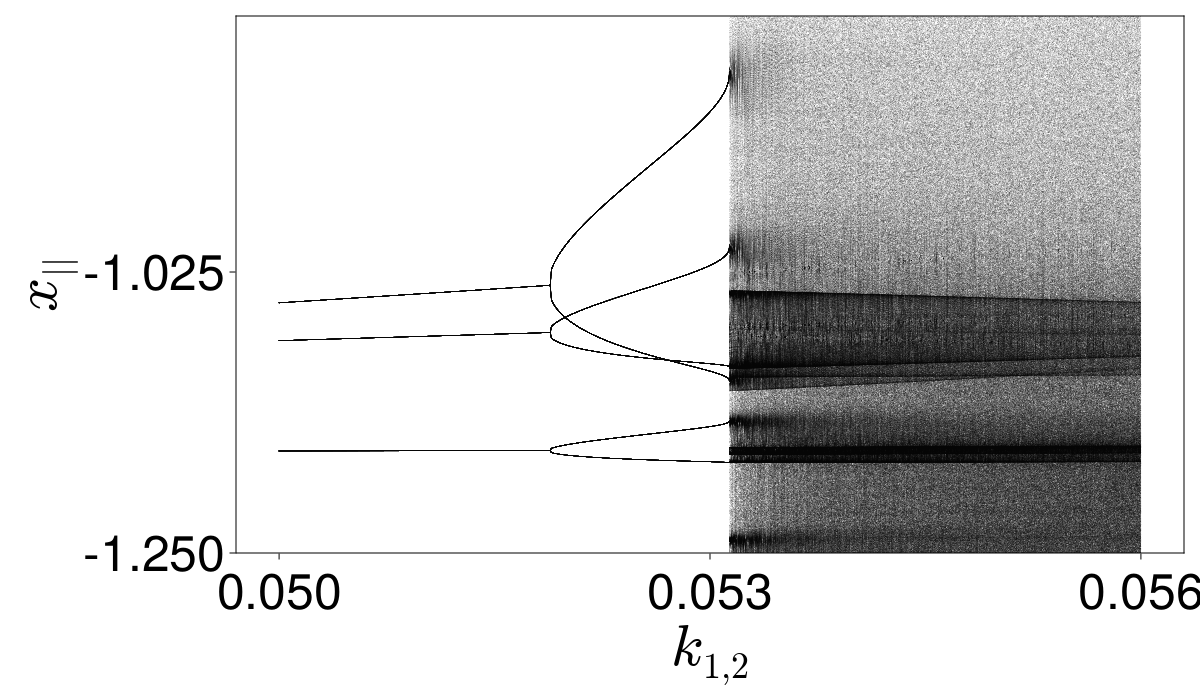

In [48]:
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )

xl = 0.050
xr = 0.056

ax.yticks = range(-1.25, -0.80, length = 3)
ax.xticks = range(xl, xr, length = 3)

#xlims!(ax, [xl, xr])
ylims!(ax, [-1.25, -0.82])

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 0.5
    )
    
end

fig